## XGBoost Classifier - Hotel Reservation 

### How to run the code

You could download this notebook and the dataset from: https://github.com/diellor/machine-learning/tree/main/hotel-reservation-xgboost, and you should install all the required packages before running the code locally.

## Problem Statement
As a Data Scientist, your task is to develop an intelligent system that can predict if a customer will honor their hotel reservation or not. Cancellations and no-shows are common in hotel reservations and have a significant impact on the hotel's planning and revenue.

You're tasked with creating a predictive model that considers features like customer details, reservation details, timing of the booking, and other relevant parameters. Your prediction model should not only predict the 'booking_status' accurately but should also identify and articulate the significant factors influencing these predictions.

To accomplish this task, you've been given a CSV file that contains historical data of online hotel reservations. This dataset includes various features along with a binary indicator 'booking_status', indicating whether the reservation was honored ('Yes') or not ('No').

Your job is to analyze this data, select the most meaningful features, and use them to train an XGBoost Classifier that can accurately predict whether any given reservation will be honored or cancelled. This prediction system should be capable of making accurate forecasts, even for reservations that are not part of the initial training dataset.

## Importing Libraries and Loading The Data

In [577]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.express as px

In [578]:
train_data = pd.read_csv('2023_DS2_HW1_data_train.csv')
test_data = pd.read_csv('2023_DS2_HW1_data_test.csv')

In [579]:
test_data

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0      INN04969           2.0             NaN                   1.0   
1      INN34541           2.0             0.0                   NaN   
2      INN36109           2.0             NaN                   NaN   
3      INN01554           2.0             NaN                   0.0   
4      INN24975           2.0             NaN                   NaN   
...         ...           ...             ...                   ...   
3588   INN29523           1.0             NaN                   NaN   
3589   INN25061           2.0             NaN                   1.0   
3590   INN08475           2.0             NaN                   NaN   
3591   INN13558           1.0             NaN                   NaN   
3592   INN00626           2.0             NaN                   0.0   

      no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                   0.0       Meal Plan 1                         NaN   
1                   2.0       Meal Plan 1                         0.0   
2                   2.0       Meal Plan 1                         0.0   
3                   3.0               NaN                         0.0   
4                   NaN               NaN                         0.0   
...                 ...               ...                         ...   
3588                2.0       Meal Plan 2                         0.0   
3589                NaN      Not Selected                         0.0   
3590                NaN               NaN                         NaN   
3591                0.0       Meal Plan 1                         NaN   
3592                4.0               NaN                         NaN   

     room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0                   NaN        NaN        2017.0            8.0          23.0   
1                   NaN        NaN        2018.0            2.0           NaN   
2                   NaN        NaN        2018.0           12.0           NaN   
3                   NaN        NaN        2018.0            6.0          21.0   
4                   NaN        NaN        2018.0            9.0           NaN   
...                 ...        ...           ...            ...           ...   
3588        Room_Type 1       39.0        2017.0            8.0           NaN   
3589                NaN        NaN        2018.0            6.0           NaN   
3590                NaN      308.0        2018.0           11.0           NaN   
3591                NaN        NaN        2018.0            7.0          24.0   
3592        Room_Type 4        NaN        2017.0           10.0           NaN   

     market_segment_type  repeated_guest  no_of_previous_cancellations  \
0                    NaN             NaN                           0.0   
1                Offline             NaN                           0.0   
2                    NaN             NaN                           0.0   
3                 Online             NaN                           0.0   
4                    NaN             NaN                           0.0   
...                  ...             ...                           ...   
3588             Offline             NaN                           0.0   
3589              Online             0.0                           0.0   
3590              Online             NaN                           0.0   
3591                 NaN             NaN                           3.0   
3592                 NaN             0.0                           0.0   

      no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                      NaN                 NaN   
1                                      0.0                 NaN   
2                                      NaN                 NaN   
3                                      0.0                 NaN   
4                                      NaN                 NaN   
...              

In [580]:
train_data.shape

(32647, 19)

From the shape of the data, we could see that there are 32642 rows that can be used for training our model.

## Data Analysis

In [581]:
train_data['booking_status'].unique()

array([ 0.,  1., nan])

In [582]:
train_data.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  28231.000000     5043.000000           7729.000000       24287.000000   
mean       1.845312        0.103510              0.807737           2.204966   
std        0.516860        0.407673              0.873931           1.411324   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000        9.000000              7.000000          17.000000   

       required_car_parking_space    lead_time  arrival_year  arrival_month  \
count                17863.000000  6935.000000  29654.000000   31740.000000   
mean                     0.033645    86.213266   2017.820092       7.419817   
std                      0.180319    85.926525      0.384118       3.062828   
min                      0.000000     0.000000   2017.000000       1.000000   
25%                      0.000000    18.000000   2018.000000       5.000000   
50%                      0.000000    59.000000   2018.000000       8.000000   
75%                      0.000000   127.000000   2018.000000      10.000000   
max                      1.000000   443.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count   5457.000000     7669.000000                  32578.000000   
mean      15.523731        0.026209                      0.023543   
std        8.726069        0.159768                      0.369300   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          18026.000000         9058.000000   
mean                               0.162155          103.601652   
std                                1.790668           35.382301   
min                                0.000000            0.000000   
25%                                0.000000           80.750000   
50%                                0.000000          100.000000   
75%                                0.000000          121.000000   
max                               58.000000          540.000000   

       no_of_special_requests  booking_status  
count            25197.000000    32295.000000  
mean                 0.622257        0.325778  
std                  0.784652        0.468672  
min                  0.000000        0.000000  
25%                  0.000000        0.000000  
50%                  0.000000        0.000000  
75%                  1.000000        1.000000  
max                  5.000000        1.000000

Identifying Categorical Data and Numerical Data from our given set

In [583]:
cols = list(train_data.columns)

# define list of numerical predictors
cols_num = [col for col in cols if train_data[col].dtype != 'O']
# define list of categorical predictors
cols_cat = [col for col in cols if train_data[col].dtype == 'O']

In [584]:
for col in cols_num:
    print(col,train_data[col].unique())
    

no_of_adults [nan  1.  3.  2.  0.  4.]
no_of_children [nan  0.  1.  2.  3.  9.]
no_of_weekend_nights [nan  1.  0.  2.  4.  7.  5.  3.  6.]
no_of_week_nights [ 2.  3.  1. nan  5.  6.  4.  0.  9.  7.  8. 12. 17. 11. 10. 13. 15. 16.
 14.]
required_car_parking_space [nan  0.  1.]
lead_time [ nan 100.  95.  47. 116.  43. 148. 104. 184.   5.   1.  83.  73. 163.
 145.  34.  54.  61.  87. 177.   6.  30.  14.  62.  90.  19.  35. 239.
  24.  68.  17.  58. 181.  10. 299.   2. 102. 110.  74. 292.  63. 115.
  36.   0.  88. 265. 112. 157.   8.  26.  11.  44.  22.  27.   9.   3.
 109.   4. 253. 164. 219.   7. 103. 335.  93.  13.  18. 135.  70.  37.
 258.  12.  72.  32.  98. 180. 117.  56. 107. 256. 172.  52. 188. 101.
  20.  28.  84.  38.  65. 275. 179. 131.  64.  75. 125. 122. 161.  49.
  29. 247. 146.  69. 202. 132.  42.  96.  48. 303. 114. 160. 134. 298.
  25. 289. 105. 238. 350. 305.  41.  91. 174. 213. 327. 118. 276. 182.
  55. 193.  23. 309. 189. 151.  81. 133.  45. 152. 176.  99.  92. 159.
  8

In [585]:
train_data.dtypes

Booking_ID                               object
no_of_adults                            float64
no_of_children                          float64
no_of_weekend_nights                    float64
no_of_week_nights                       float64
type_of_meal_plan                        object
required_car_parking_space              float64
room_type_reserved                       object
lead_time                               float64
arrival_year                            float64
arrival_month                           float64
arrival_date                            float64
market_segment_type                      object
repeated_guest                          float64
no_of_previous_cancellations            float64
no_of_previous_bookings_not_canceled    float64
avg_price_per_room                      float64
no_of_special_requests                  float64
booking_status                          float64
dtype: object

In [586]:
train_data.head(10)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN10204           NaN             NaN                   NaN   
1   INN20020           NaN             NaN                   NaN   
2   INN16435           1.0             NaN                   NaN   
3   INN07143           3.0             NaN                   NaN   
4   INN20511           1.0             0.0                   1.0   
5   INN17688           1.0             0.0                   NaN   
6   INN28822           2.0             NaN                   NaN   
7   INN33792           1.0             NaN                   0.0   
8   INN12973           2.0             NaN                   NaN   
9   INN22630           2.0             NaN                   NaN   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                2.0       Meal Plan 2                         NaN   
1                2.0       Meal Plan 1                         NaN   
2                2.0               NaN                         0.0   
3                3.0               NaN                         NaN   
4                1.0       Meal Plan 1                         0.0   
5                3.0       Meal Plan 1                         NaN   
6                2.0               NaN                         NaN   
7                NaN       Meal Plan 2                         0.0   
8                NaN               NaN                         0.0   
9                5.0               NaN                         NaN   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 6        NaN        2018.0            9.0           NaN   
1                NaN        NaN           NaN           12.0           NaN   
2        Room_Type 1        NaN        2018.0           11.0           NaN   
3                NaN      100.0        2018.0            5.0           NaN   
4                NaN        NaN        2018.0           11.0           NaN   
5                NaN        NaN        2017.0            9.0           NaN   
6        Room_Type 1       95.0        2018.0            5.0           NaN   
7                NaN        NaN        2018.0            6.0          24.0   
8                NaN        NaN        2018.0            8.0           2.0   
9        Room_Type 1        NaN        2017.0            9.0           NaN   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0              Online             0.0                           0.0   
1              Online             0.0                           0.0   
2                 NaN             0.0                           0.0   
3              Online             0.0                           0.0   
4                 NaN             0.0                           0.0   
5                 NaN             0.0                           0.0   
6                 NaN             0.0                           0.0   
7                 NaN             0.0                           0.0   
8              Online             0.0                           0.0   
9                 NaN             0.0                           0.0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                   NaN                 NaN   
1                                   0.0                 NaN   
2                                   NaN                 NaN   
3                                   NaN                 NaN   
4                                   0.0              150.00   
5                                   0.0                 NaN   
6                                   0.0               80.75   
7                                   NaN                 NaN   
8                                   0.0              121.50   
9                                   0.0                 NaN   

   no_of_special_requests  booking_status  
0                     1.0             0.0  
1                     NaN             0.0  
2              

### We can see that no_of_children, no_of_weekend_nights, lead_time, arrival_date, avg_price_per_room have a lot of missing values.

In [587]:
train_data.isnull().mean().sort_values()

Booking_ID                              0.000000
no_of_previous_cancellations            0.002114
booking_status                          0.010782
arrival_month                           0.027782
arrival_year                            0.091678
no_of_adults                            0.135265
no_of_special_requests                  0.228199
no_of_week_nights                       0.256073
market_segment_type                     0.432536
no_of_previous_bookings_not_canceled    0.447851
required_car_parking_space              0.452844
type_of_meal_plan                       0.493246
room_type_reserved                      0.652035
avg_price_per_room                      0.722547
no_of_weekend_nights                    0.763255
repeated_guest                          0.765093
lead_time                               0.787576
arrival_date                            0.832848
no_of_children                          0.845529
dtype: float64

In [588]:
train_data[train_data['no_of_previous_cancellations'].isnull()] # returns all the values where this atrb. is NaN

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
351     INN34663           2.0             NaN                   NaN   
864     INN05865           1.0             NaN                   NaN   
1099    INN31791           2.0             0.0                   0.0   
2142    INN21265           2.0             NaN                   NaN   
2186    INN07224           2.0             NaN                   0.0   
...          ...           ...             ...                   ...   
31086   INN30660           1.0             NaN                   NaN   
31798   INN20610           1.0             0.0                   NaN   
31844   INN11955           1.0             0.0                   NaN   
32493   INN26737           1.0             0.0                   1.0   
32501   INN30304           1.0             NaN                   NaN   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
351                  NaN               NaN                         0.0   
864                  3.0       Meal Plan 1                         NaN   
1099                 3.0               NaN                         NaN   
2142                 NaN               NaN                         0.0   
2186                 3.0               NaN                         0.0   
...                  ...               ...                         ...   
31086                2.0      Not Selected                         0.0   
31798                3.0               NaN                         NaN   
31844                2.0       Meal Plan 1                         NaN   
32493                3.0       Meal Plan 1                         NaN   
32501                3.0       Meal Plan 1                         NaN   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
351                  NaN        8.0        2018.0           11.0   
864                  NaN        NaN        2018.0            4.0   
1099                 NaN        NaN        2018.0            9.0   
2142                 NaN        NaN        2018.0           11.0   
2186                 NaN        NaN        2018.0            2.0   
...                  ...        ...           ...            ...   
31086                NaN        6.0        2018.0            5.0   
31798        Room_Type 1        NaN        2017.0            8.0   
31844        Room_Type 1        NaN        2018.0            6.0   
32493        Room_Type 1        NaN        2018.0            4.0   
32501                NaN        NaN        2018.0            9.0   

       arrival_date market_segment_type  repeated_guest  \
351             NaN                 NaN             NaN   
864             NaN                 NaN             NaN   
1099            NaN                 NaN             0.0   
2142            NaN              Online             NaN   
2186            NaN             Offline             NaN   
...             ...                 ...             ...   
31086           NaN                 NaN             NaN   
31798           NaN       Complementary             0.0   
31844           NaN                 NaN             NaN   
32493           NaN                 NaN             NaN   
32501           NaN             Offline             NaN   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
351                             NaN                                   0.0   
864                             NaN                                   1.0   
1099                            NaN                                   0.0   
2142                            NaN                                   0.0   
2186                            NaN                                   0.0   
...                             ...                                   ...   
31086                           NaN                                   NaN   
31798                           NaN                                   NaN   
31844                           N

In [589]:
cols_num

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'booking_status']

In [590]:
cols_num = cols_num

In [591]:
cols_num

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'booking_status']

### With the code below I wanna make sure that all non-numeric values are NaN, so I can replace them using fillna afterwards. 

In [592]:
for col in cols_num:
    train_data[col] = (
    pd.to_numeric(train_data[col],
                  errors='coerce')
      .fillna(np.nan)
    )
train_data

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN10204           NaN             NaN                   NaN   
1       INN20020           NaN             NaN                   NaN   
2       INN16435           1.0             NaN                   NaN   
3       INN07143           3.0             NaN                   NaN   
4       INN20511           1.0             0.0                   1.0   
...          ...           ...             ...                   ...   
32642   INN16851           2.0             NaN                   NaN   
32643   INN06266           1.0             NaN                   NaN   
32644   INN11285           2.0             NaN                   NaN   
32645   INN00861           2.0             NaN                   NaN   
32646   INN15796           2.0             NaN                   NaN   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                    2.0       Meal Plan 2                         NaN   
1                    2.0       Meal Plan 1                         NaN   
2                    2.0               NaN                         0.0   
3                    3.0               NaN                         NaN   
4                    1.0       Meal Plan 1                         0.0   
...                  ...               ...                         ...   
32642                NaN       Meal Plan 1                         NaN   
32643                2.0       Meal Plan 2                         0.0   
32644                2.0               NaN                         NaN   
32645                3.0       Meal Plan 1                         0.0   
32646                2.0               NaN                         NaN   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
0            Room_Type 6        NaN        2018.0            9.0   
1                    NaN        NaN           NaN           12.0   
2            Room_Type 1        NaN        2018.0           11.0   
3                    NaN      100.0        2018.0            5.0   
4                    NaN        NaN        2018.0           11.0   
...                  ...        ...           ...            ...   
32642                NaN       43.0        2017.0           12.0   
32643        Room_Type 1      102.0        2017.0           10.0   
32644                NaN        NaN        2018.0            5.0   
32645                NaN        NaN        2018.0            6.0   
32646                NaN       14.0        2018.0            9.0   

       arrival_date market_segment_type  repeated_guest  \
0               NaN              Online             0.0   
1               NaN              Online             0.0   
2               NaN                 NaN             0.0   
3               NaN              Online             0.0   
4               NaN                 NaN             0.0   
...             ...                 ...             ...   
32642          26.0             Offline             NaN   
32643           NaN              Online             NaN   
32644           NaN           Corporate             0.0   
32645           NaN              Online             NaN   
32646          15.0              Online             NaN   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                               0.0                                   NaN   
1                               0.0                                   0.0   
2                               0.0                                   NaN   
3                               0.0                                   NaN   
4                               0.0                                   0.0   
...                             ...                                   ...   
32642                           0.0                                   0.0   
32643                           0.0                                   NaN   
32644                           0

In [593]:
train_data['no_of_weekend_nights'].isnull().sum()

24918

In [594]:
train_data.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  28231.000000     5043.000000           7729.000000       24287.000000   
mean       1.845312        0.103510              0.807737           2.204966   
std        0.516860        0.407673              0.873931           1.411324   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000        9.000000              7.000000          17.000000   

       required_car_parking_space    lead_time  arrival_year  arrival_month  \
count                17863.000000  6935.000000  29654.000000   31740.000000   
mean                     0.033645    86.213266   2017.820092       7.419817   
std                      0.180319    85.926525      0.384118       3.062828   
min                      0.000000     0.000000   2017.000000       1.000000   
25%                      0.000000    18.000000   2018.000000       5.000000   
50%                      0.000000    59.000000   2018.000000       8.000000   
75%                      0.000000   127.000000   2018.000000      10.000000   
max                      1.000000   443.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count   5457.000000     7669.000000                  32578.000000   
mean      15.523731        0.026209                      0.023543   
std        8.726069        0.159768                      0.369300   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          18026.000000         9058.000000   
mean                               0.162155          103.601652   
std                                1.790668           35.382301   
min                                0.000000            0.000000   
25%                                0.000000           80.750000   
50%                                0.000000          100.000000   
75%                                0.000000          121.000000   
max                               58.000000          540.000000   

       no_of_special_requests  booking_status  
count            25197.000000    32295.000000  
mean                 0.622257        0.325778  
std                  0.784652        0.468672  
min                  0.000000        0.000000  
25%                  0.000000        0.000000  
50%                  0.000000        0.000000  
75%                  1.000000        1.000000  
max                  5.000000        1.000000

In [595]:
train_data['no_of_weekend_nights'].unique()

array([nan,  1.,  0.,  2.,  4.,  7.,  5.,  3.,  6.])

## Exploratory Data Analysis and Visualization

In order to understand the data that's available, we must perform data analysis by vizualizing the distribution of values in each feature, and the relationships between selling price and other features. By features I mean the columns of the data.

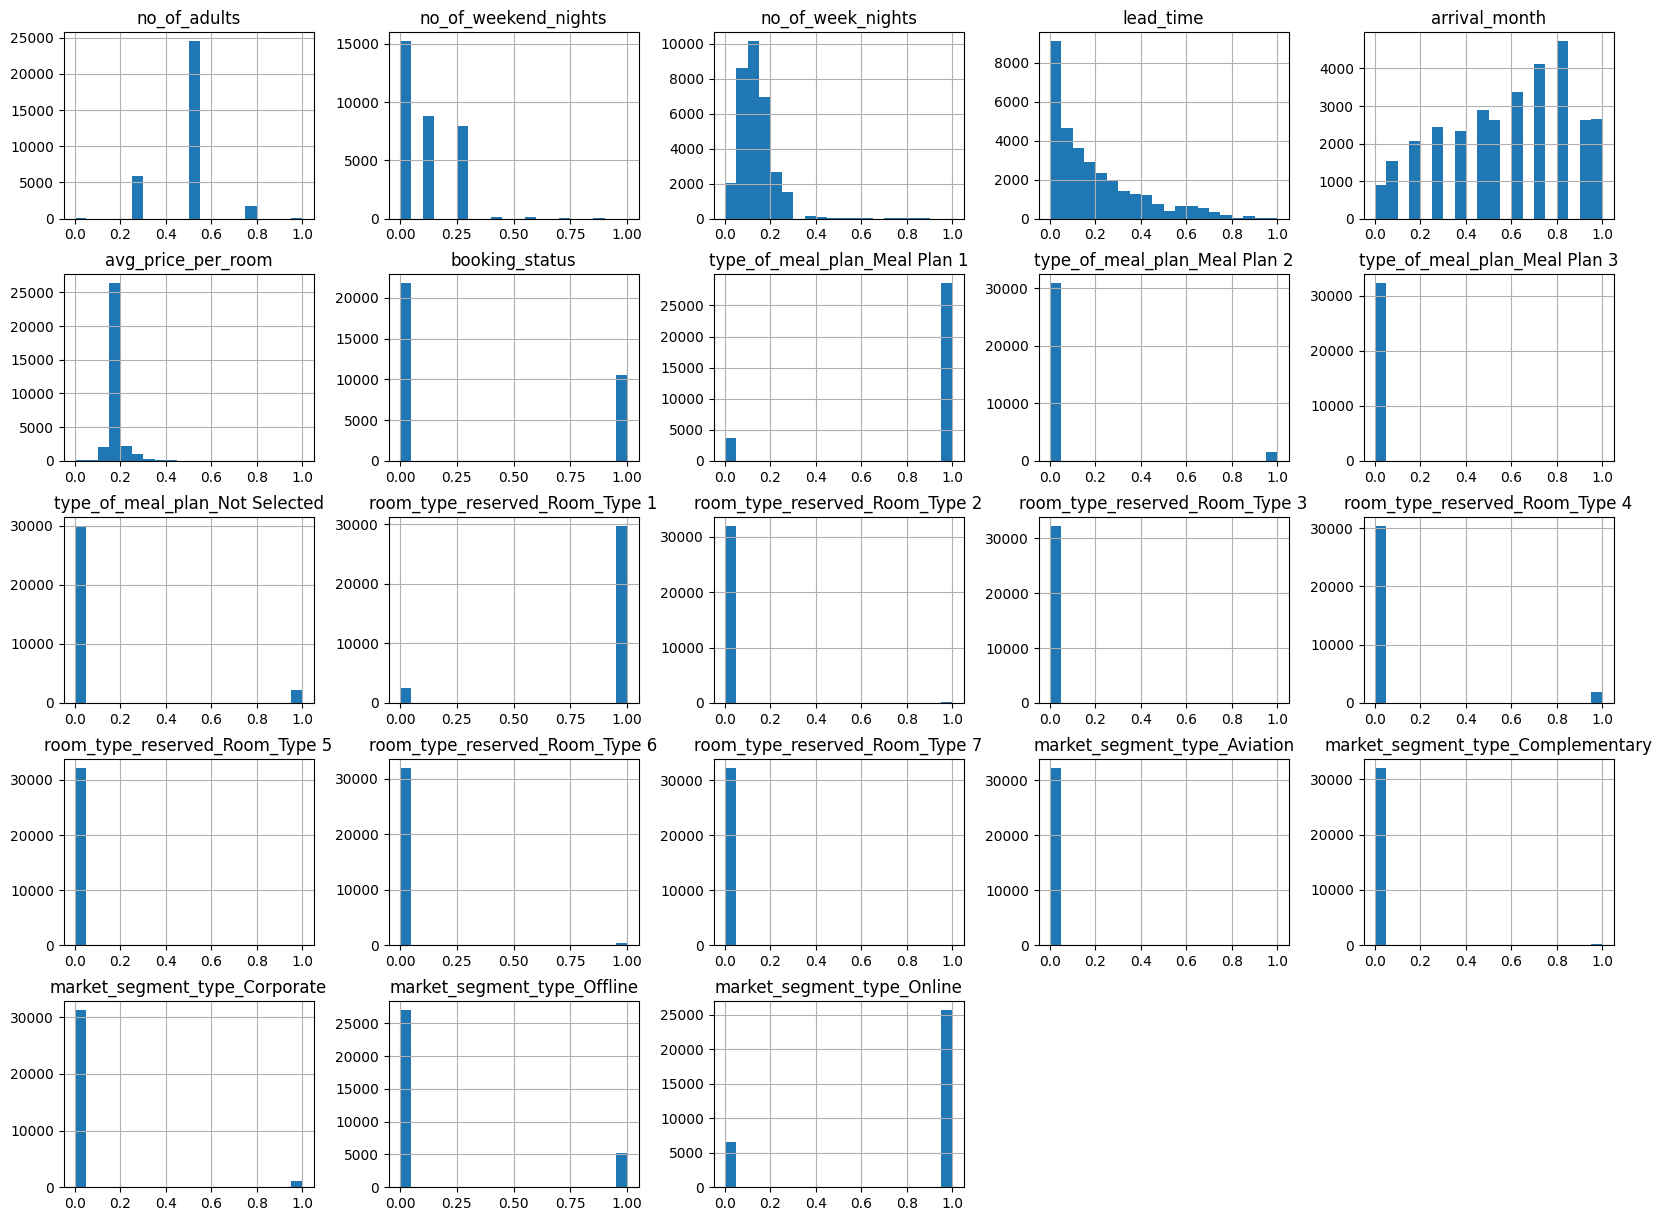

In [640]:
# Plot histograms for all columns
train_data.hist(bins=20, figsize=(20,15))
plt.show()

I'll remove some features such as no_of_previous_bookings_not_canceled, since it's there's not much values aside 0. Also will remove repeated_guest, no_of_previous_cancellations, required_car_parking_space.

The columns that I've removed below, are as a result of analysis that's performed on the data. The columns that have no correlation with the target value (cancleing or not the reservation) have been removed.

In [597]:
cols_num.remove('booking_status')
cols_num.remove('repeated_guest')
cols_num.remove('no_of_previous_cancellations')
cols_num.remove('no_of_previous_bookings_not_canceled')
cols_num.remove('required_car_parking_space')
cols_num.remove('arrival_year')
cols_num.remove('arrival_date')
cols_num.remove('no_of_special_requests') ## Based on our corelation matrix we're removing features with high negative corelation with target atribute.
# cols_num.remove('arrival_month')

In [598]:
cols_cat

['Booking_ID',
 'type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type']

<AxesSubplot:>

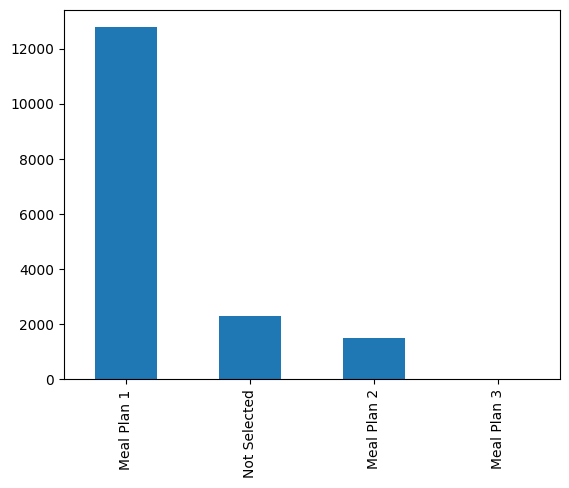

In [599]:
train_data["type_of_meal_plan"].value_counts().plot(kind="bar")

<AxesSubplot:>

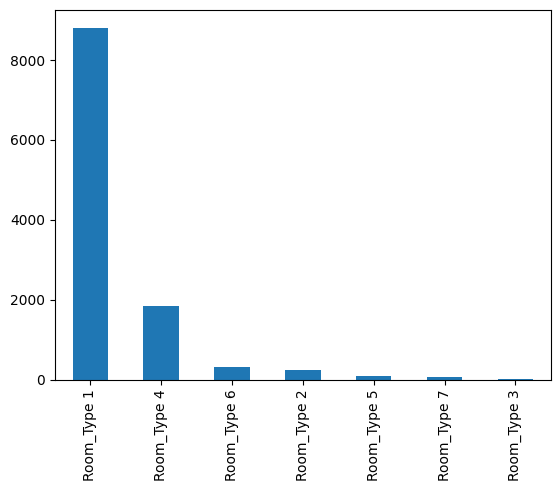

In [600]:
train_data["room_type_reserved"].value_counts().plot(kind="bar")

<AxesSubplot:>

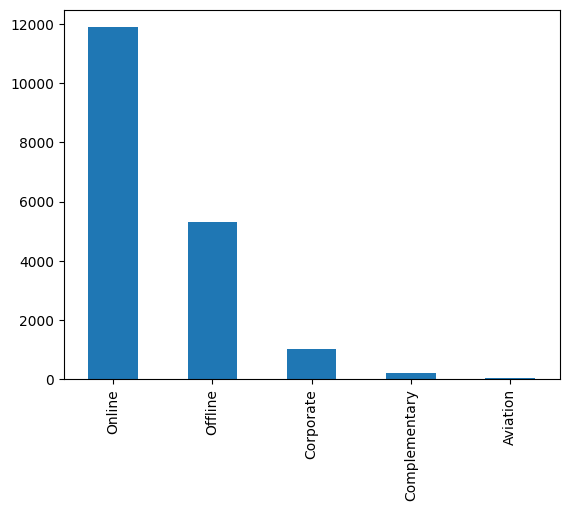

In [601]:
train_data["market_segment_type"].value_counts().plot(kind="bar")

<AxesSubplot:>

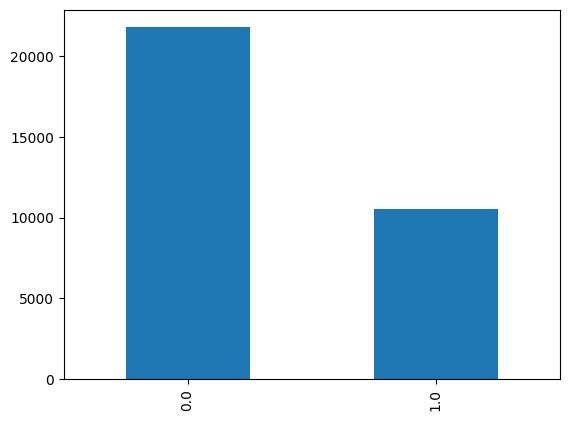

In [602]:
train_data['booking_status'].value_counts().plot(kind="bar")

As we can see from the plot above, the dataset is imbalanced. We should fix this imbalance representation of one class using imbalance datasets techqniues such as SMOTE or some other technique.

In [603]:
px.histogram(train_data, x='lead_time', color='booking_status', title='No. of days that elapsed between the entering date of the booking and the arrival date')

In [604]:
px.histogram(train_data, x='no_of_special_requests', color='booking_status', title='No. of days that elapsed between the entering date of the booking and the arrival date')

From the plot above we could see that the clients who were more invested in the rooms like making special requests for the room, tend to not cancel the booking, because the number of the canceled requests drops significantlly, this can be due to imbalance of dataset too though.

In [605]:
px.histogram(train_data, x='avg_price_per_room', color='booking_status', title='Price per room, and cancelled or not')

In [606]:
px.histogram(train_data, x='arrival_month', color='booking_status', title='Arrival Month')

In [607]:
px.histogram(train_data, x='no_of_week_nights', color='booking_status', title='Price per room, and cancelled or not')

From the two plots above we can't actually infere any relationship to the cancelation of the reservation

### Vizualizing Categorical Data vs Booking Status

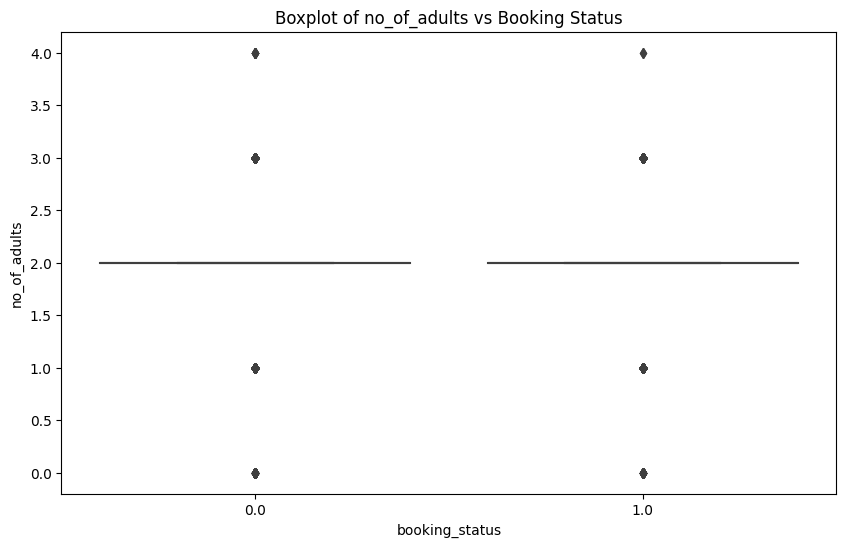

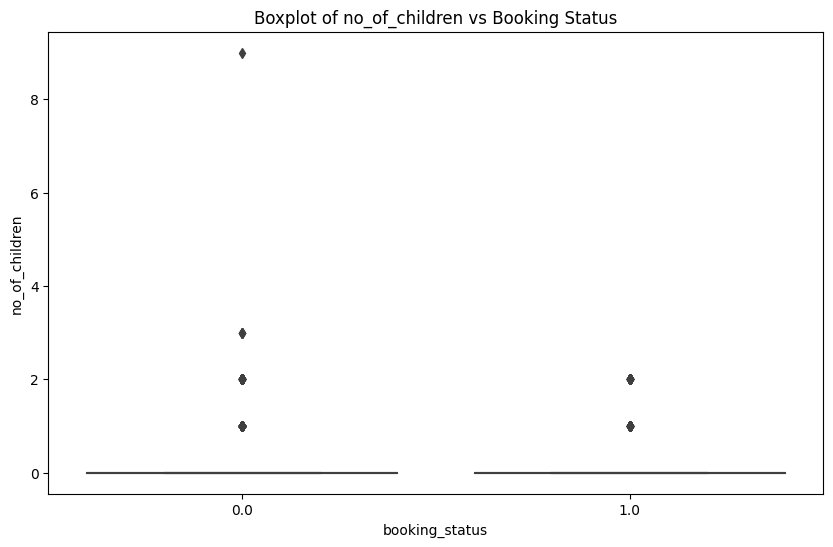

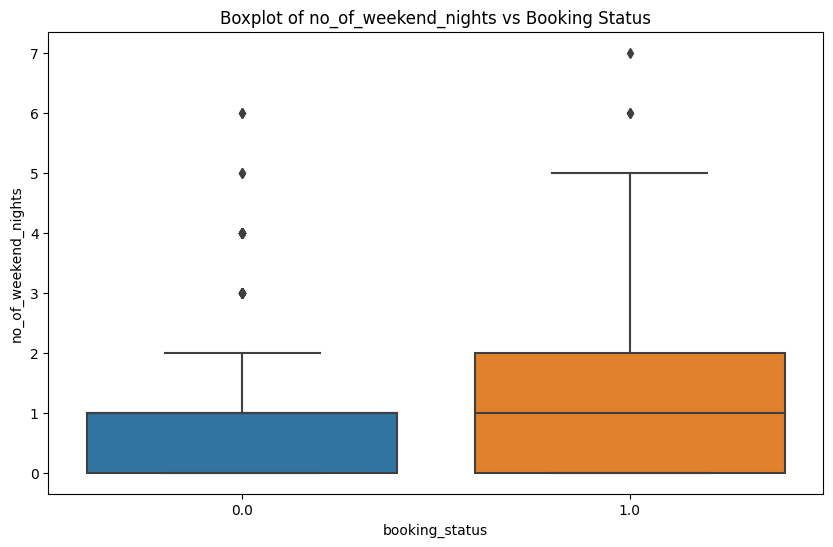

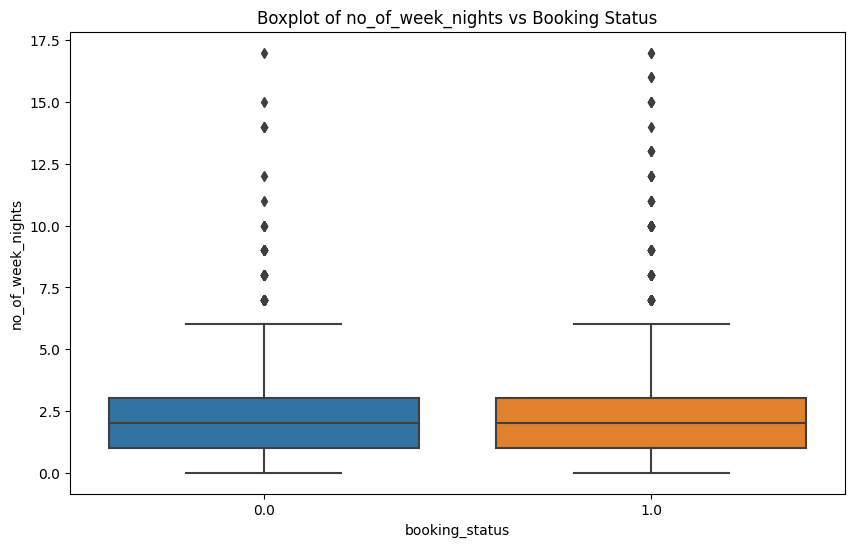

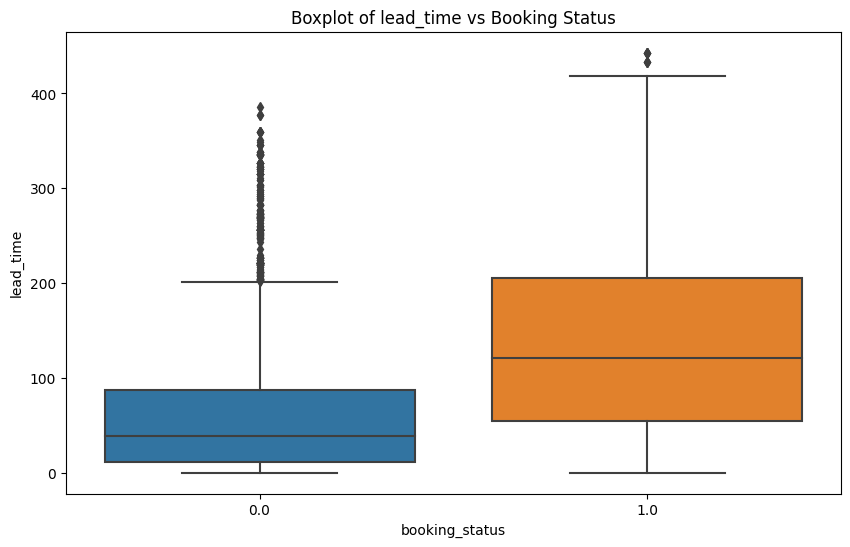

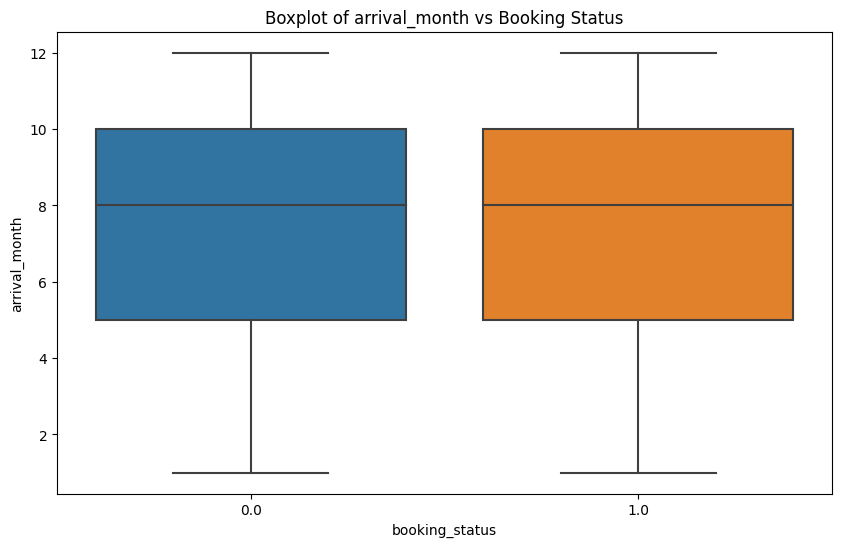

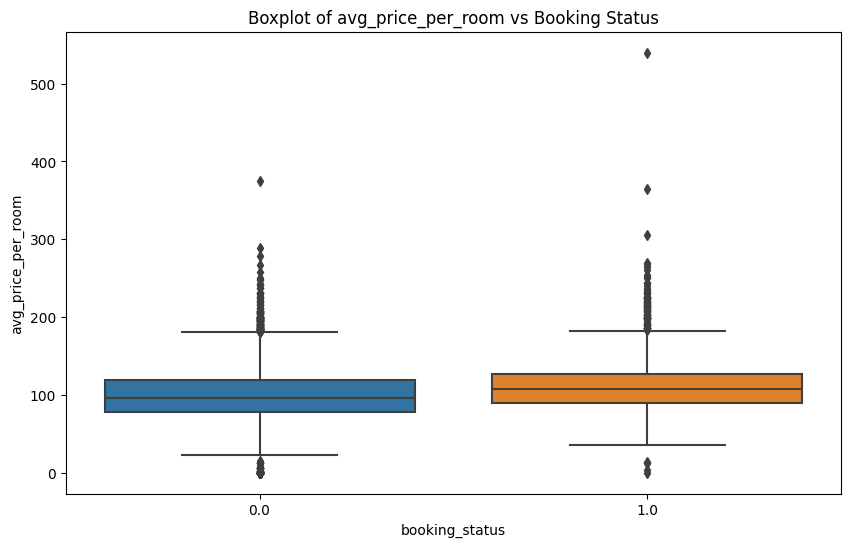

In [608]:
# Assuming 'df' is your DataFrame and 'booking_status' is your target variable
# numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

for feature in cols_num:
    plt.figure(figsize=(10,6))
    sns.boxplot(x='booking_status', y=feature, data=train_data)
    plt.title(f'Boxplot of {feature} vs Booking Status')
    plt.show()

Features like lead_time, and no_of_weekend_nights, seem to have a correlation to our booking_status. The greater the time between the reserved date and arrival date, the more people have actually canceled their reservation.

In [609]:
px.histogram(train_data, x='market_segment_type', color='booking_status', title='Market segment designation')

In [610]:
px.histogram(train_data, x='room_type_reserved', color='booking_status', title='Room Type reserved')

In [611]:
px.histogram(train_data, x='type_of_meal_plan', color='booking_status', title='Meal plan type')

We can't infere much from the plots (categorical variables) above.

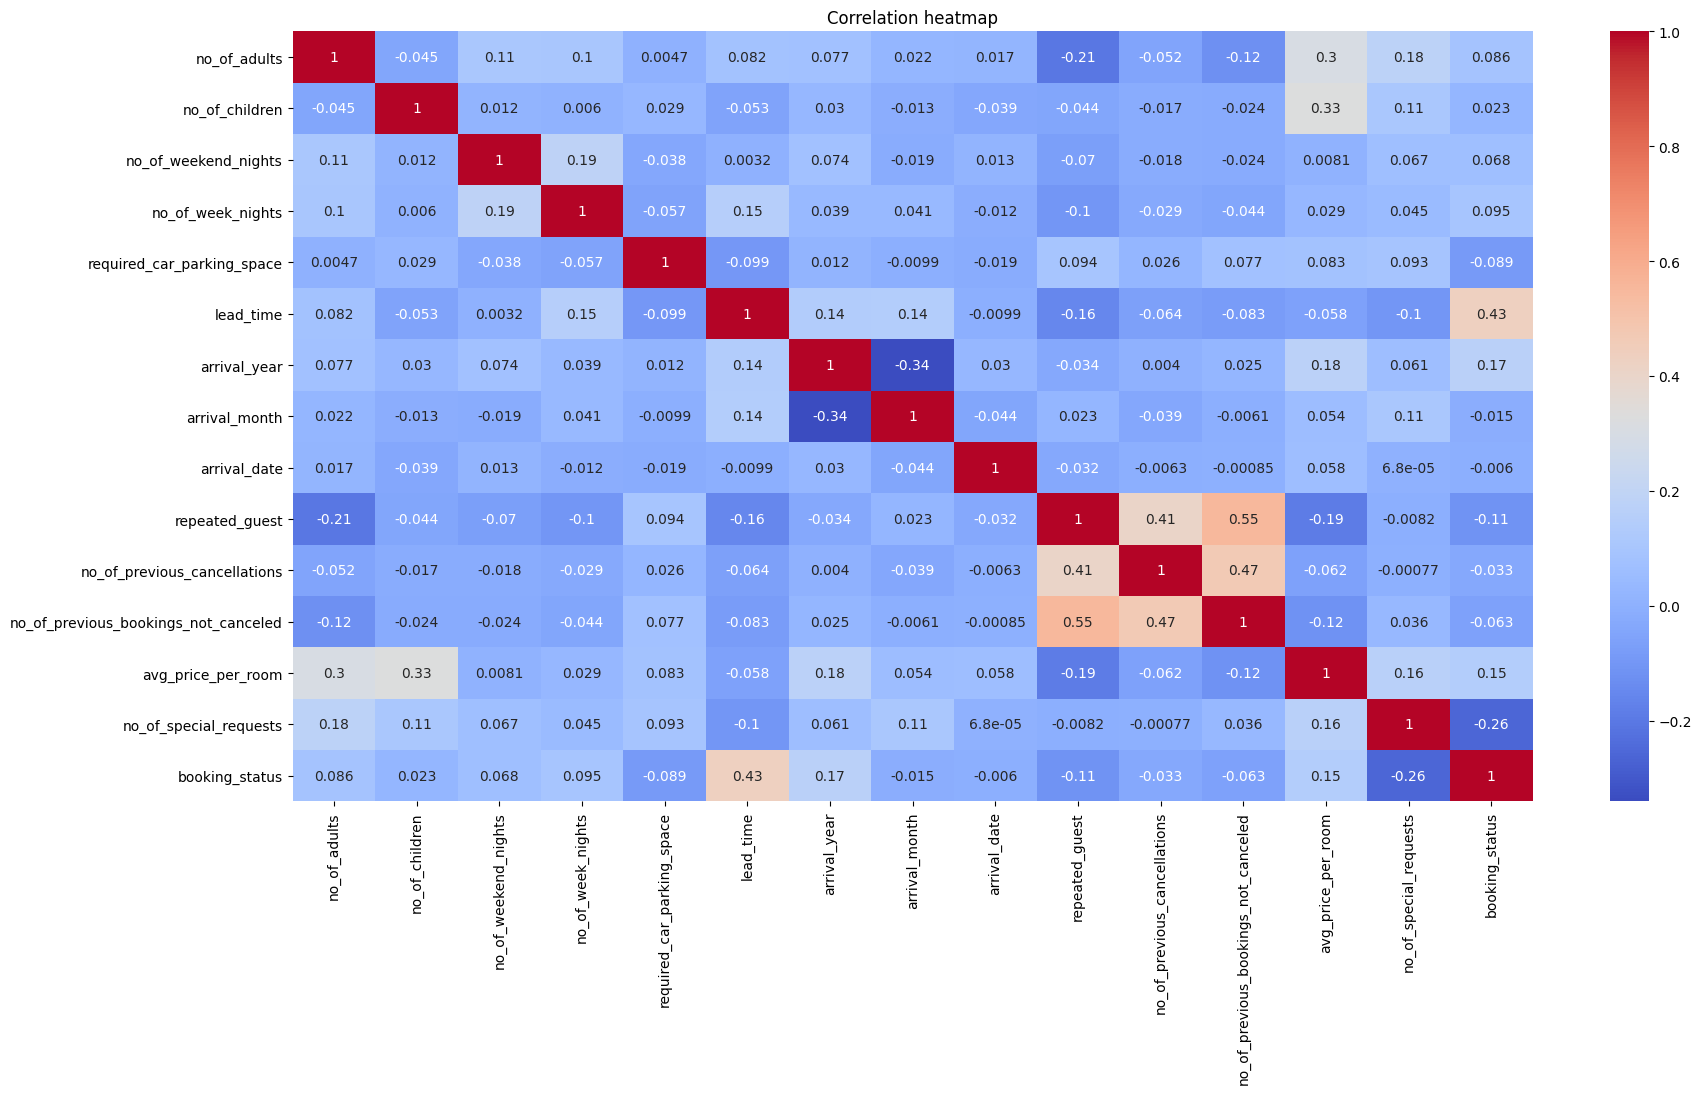

In [612]:
correlation_matrix = train_data.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation heatmap")
plt.show()

As we can see fromt he corelation matrix, features one important feature is lead_time. Also negative features like arrival_month, arrival_date, repeated_guest, etc. will be removed from our analysis.

From the plot above we could observe that different months, have different number of reservations and also different cancelation rate.

## Handling Missing Values

Handling missing values is a very important step in data preprocessing. The strategy to handle these missing values depends based on the type of data and the nature of the problem.

For numerical data, it's common to use the following techniques:

Drop: Remove rows with missing values.
Mean/Median: Replace missing values with the mean or median of the non-missing values. Mean is sensitive to outliers while median is not, it might be more suitable to use median.
Random: Substitute missing values with a random value from the available data.
K-Nearest Neighbors (KNN): Impute missing values using the KNN algorithm, which fills missing values based on similar "neighbour" observations.

For categorical data, it's common to use the following techniques:

Drop: Remove rows with missing values.
Mode: Replace missing values with the mode (most frequent value).
Random: Same as for numerical data.
KNN: Can also be used for categorical data, where the most common class among the K-nearest neighbors replaces the missing value.
Choosing the right method depends on the specific data, the importance of the feature, and the proportion of missing values.

There are more techiques for handling missing values, and they really important and depending on problem you might expertiment with different approaches.

In [613]:
train_data = train_data[cols_num+cols_cat+['booking_status']]
test_data = test_data[cols_num+cols_cat]

In [614]:
train_data = train_data.drop('Booking_ID', axis=1)
test_data = test_data.drop('Booking_ID', axis=1)

In [615]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32647 entries, 0 to 32646
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   no_of_adults          28231 non-null  float64
 1   no_of_children        5043 non-null   float64
 2   no_of_weekend_nights  7729 non-null   float64
 3   no_of_week_nights     24287 non-null  float64
 4   lead_time             6935 non-null   float64
 5   arrival_month         31740 non-null  float64
 6   avg_price_per_room    9058 non-null   float64
 7   type_of_meal_plan     16544 non-null  object 
 8   room_type_reserved    11360 non-null  object 
 9   market_segment_type   18526 non-null  object 
 10  booking_status        32295 non-null  float64
dtypes: float64(8), object(3)
memory usage: 2.7+ MB


Since there are not too many missing values in booking_status columns, we will remove all rows which have the booking status missing, since that's one of our variables we're trying to predict it's important to have the correct information on booking status only.

In [616]:
train_data.isnull().mean().sort_values()

booking_status          0.010782
arrival_month           0.027782
no_of_adults            0.135265
no_of_week_nights       0.256073
market_segment_type     0.432536
type_of_meal_plan       0.493246
room_type_reserved      0.652035
avg_price_per_room      0.722547
no_of_weekend_nights    0.763255
lead_time               0.787576
no_of_children          0.845529
dtype: float64

array([[<AxesSubplot:title={'center':'no_of_adults'}>,
        <AxesSubplot:title={'center':'no_of_children'}>,
        <AxesSubplot:title={'center':'no_of_weekend_nights'}>],
       [<AxesSubplot:title={'center':'no_of_week_nights'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_month'}>],
       [<AxesSubplot:title={'center':'avg_price_per_room'}>,
        <AxesSubplot:title={'center':'booking_status'}>, <AxesSubplot:>]],
      dtype=object)

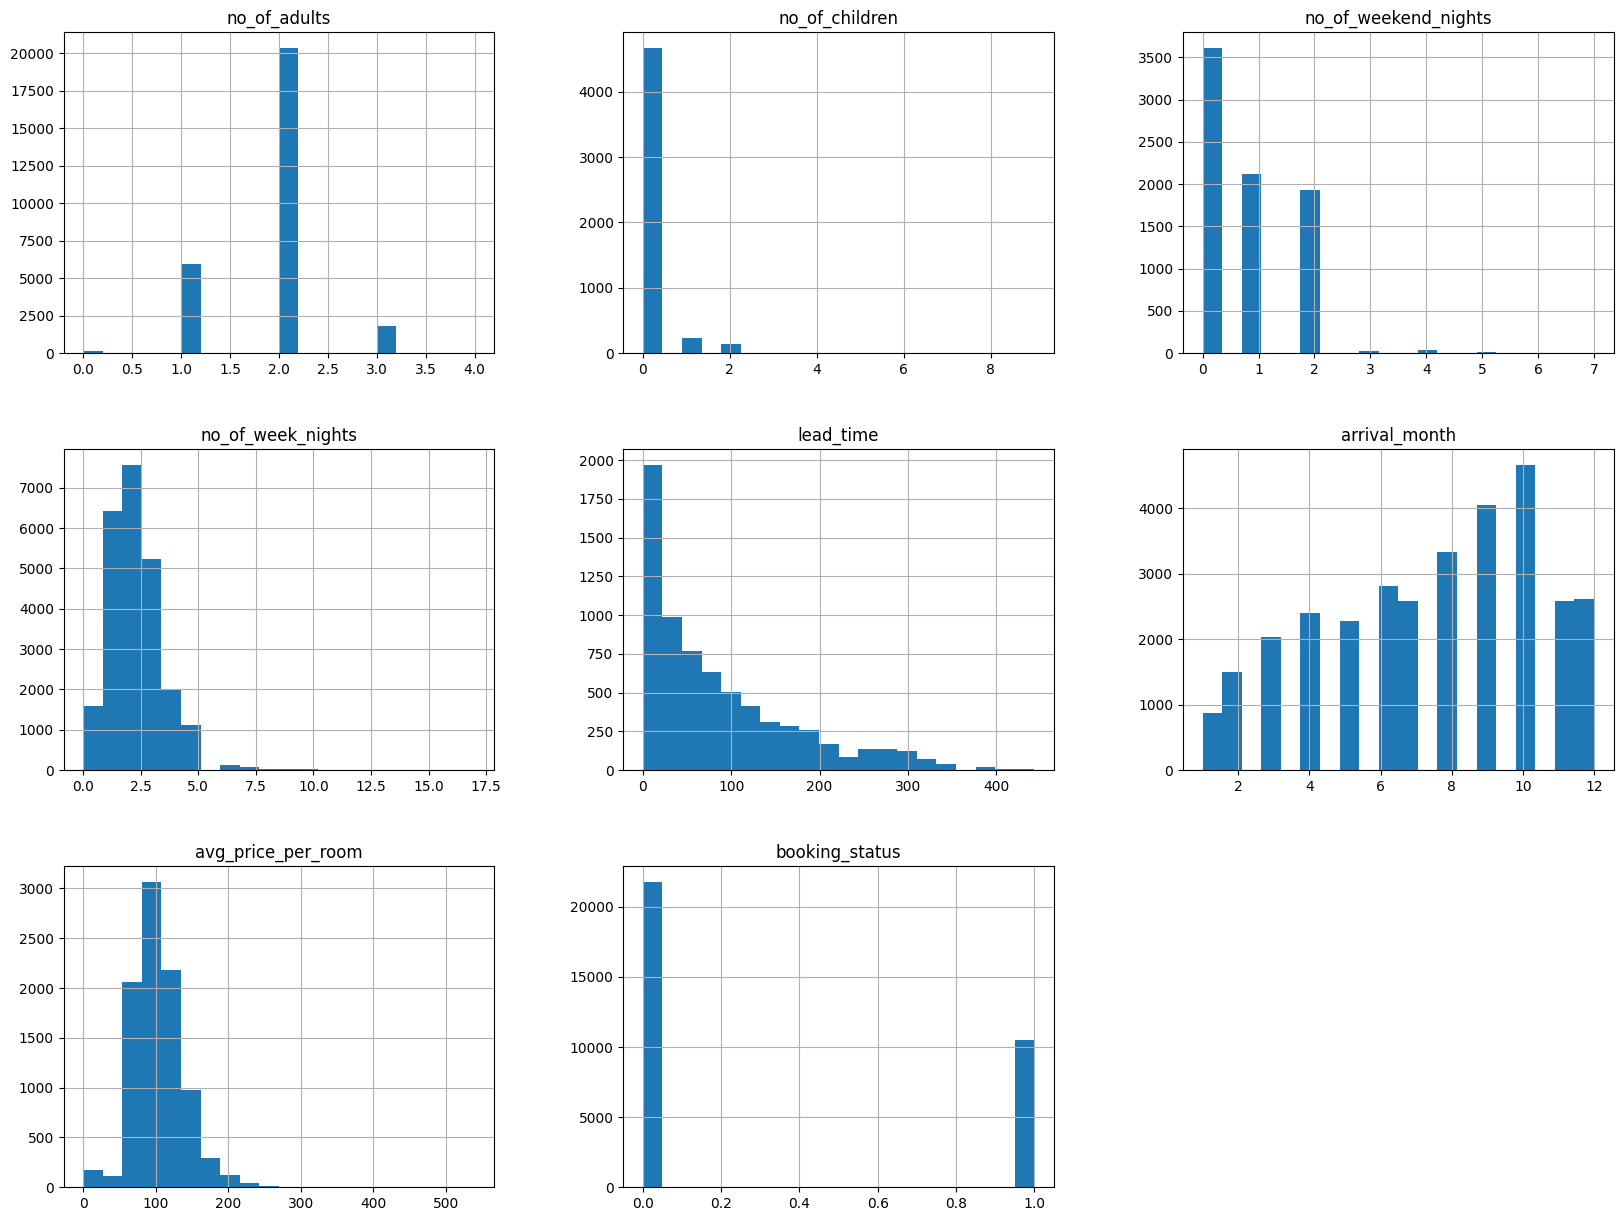

In [617]:
train_data.hist(bins=20, figsize=(20,15))

In [618]:
def handle_missing(table, columns = None, method = 'drop'):
    table = table.copy()
    if columns == None:
        columns = table.columns
    for col in columns:
        if method == 'drop':
            table[col].dropna(inplace=True)
        elif method == 'mode':
            table[col].fillna(table[col].mode()[0], inplace = True)
        elif method == 'median':
            table[col].fillna(table[col].median(), inplace = True)
        elif method == 'mean':
            table[col].fillna(table[col].mean(), inplace = True)
        elif method == 'random':
            table[col] = table[col].apply(lambda x: np.random.choice(table[col].dropna().values) if np.isnan(x) else x)
    return table

In [619]:
## Remove no_of_children column, too many missing values
train_data = train_data.drop('no_of_children', axis=1)
test_data = test_data.drop('no_of_children', axis=1)

from sklearn.impute import KNNImputer

# instantiate the imputer, let's say with k=3 (you may tune k as needed)
knn_imputer = KNNImputer(n_neighbors=3)

# select the columns to impute
cols_to_impute = ['avg_price_per_room']

# apply the imputer
train_data[cols_to_impute] = knn_imputer.fit_transform(train_data[cols_to_impute])
test_data[cols_to_impute] = knn_imputer.transform(test_data[cols_to_impute])


# Check the result
print(train_data[cols_to_impute].isnull().sum())


avg_price_per_room    0
dtype: int64


In [620]:
train_data = handle_missing(train_data, columns=['no_of_week_nights','no_of_weekend_nights','lead_time', "arrival_month"], method = 'random')
test_data = handle_missing(test_data, columns=['no_of_week_nights','no_of_weekend_nights','lead_time', "arrival_month"], method = 'random')

In [621]:
train_data = handle_missing(train_data, columns=[ "no_of_adults",
                                        "type_of_meal_plan","market_segment_type", "room_type_reserved"
                                                 ],
               method = 'mode')
test_data = handle_missing(test_data, columns=[ "no_of_adults",
                                        "type_of_meal_plan","market_segment_type", "room_type_reserved"
                                                 ],
               method = 'mode')

array([[<AxesSubplot:title={'center':'no_of_adults'}>,
        <AxesSubplot:title={'center':'no_of_weekend_nights'}>,
        <AxesSubplot:title={'center':'no_of_week_nights'}>],
       [<AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_month'}>,
        <AxesSubplot:title={'center':'avg_price_per_room'}>],
       [<AxesSubplot:title={'center':'booking_status'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

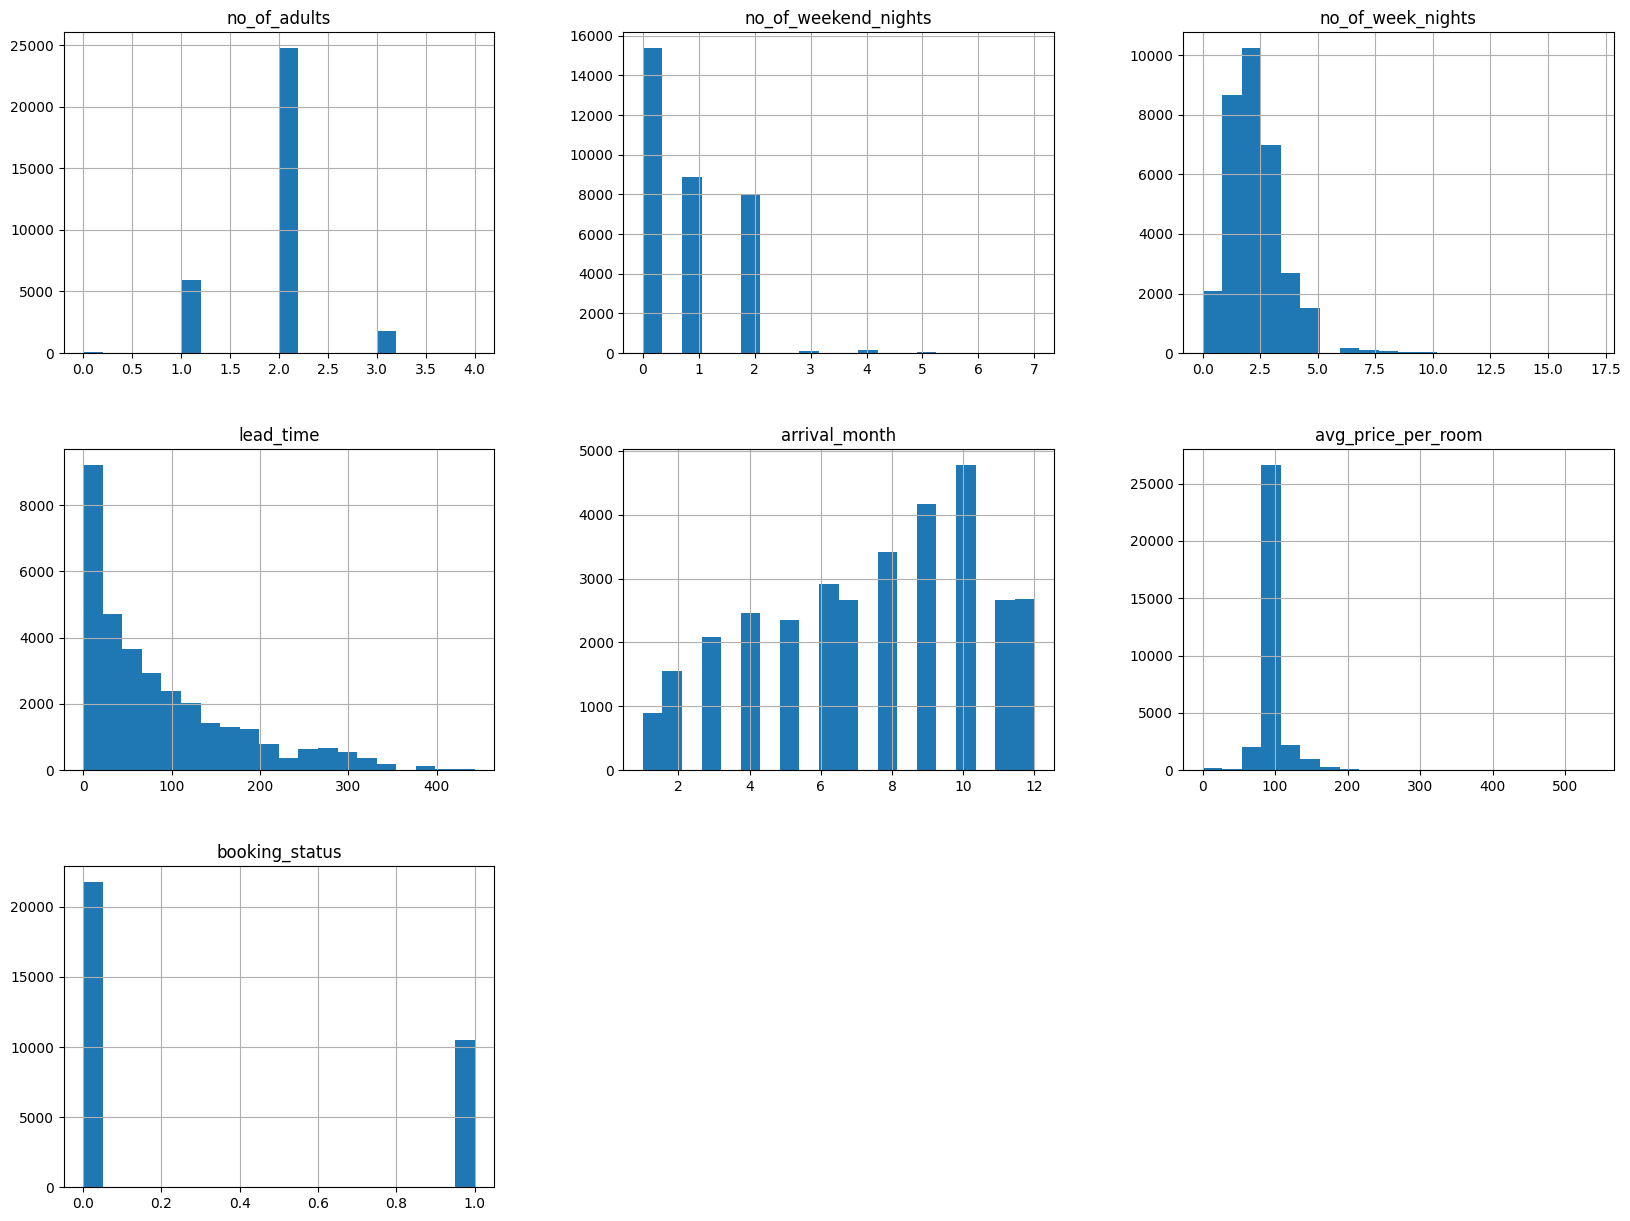

In [622]:
train_data.hist(bins=20, figsize=(20,15))

## Defining our Input Train_Data Set

In [623]:
train_data.isnull().mean().sort_values()

no_of_adults            0.000000
no_of_weekend_nights    0.000000
no_of_week_nights       0.000000
lead_time               0.000000
arrival_month           0.000000
avg_price_per_room      0.000000
type_of_meal_plan       0.000000
room_type_reserved      0.000000
market_segment_type     0.000000
booking_status          0.010782
dtype: float64

In [624]:
train_data = train_data.dropna(subset=['booking_status'])

In [625]:
train_data.isnull().mean().sort_values()

no_of_adults            0.0
no_of_weekend_nights    0.0
no_of_week_nights       0.0
lead_time               0.0
arrival_month           0.0
avg_price_per_room      0.0
type_of_meal_plan       0.0
room_type_reserved      0.0
market_segment_type     0.0
booking_status          0.0
dtype: float64

In [626]:
train_data.describe()

no_of_adults  no_of_weekend_nights  no_of_week_nights     lead_time  \
count  32295.000000          32295.000000       32295.000000  32295.000000   
mean       1.865985              0.802415           2.202570     86.199566   
std        0.483517              0.877423           1.398058     85.886736   
min        0.000000              0.000000           0.000000      0.000000   
25%        2.000000              0.000000           1.000000     18.000000   
50%        2.000000              1.000000           2.000000     58.000000   
75%        2.000000              2.000000           3.000000    127.000000   
max        4.000000              7.000000          17.000000    443.000000   

       arrival_month  avg_price_per_room  booking_status  
count   32295.000000        32295.000000    32295.000000  
mean        7.417123          103.591081        0.325778  
std         3.063246           18.651547        0.468672  
min         1.000000            0.000000        0.000000  
25%         5.000000          103.601652        0.000000  
50%         8.000000          103.601652        0.000000  
75%        10.000000          103.601652        1.000000  
max        12.000000          540.000000        1.000000

## Data Normalization

Scaling numerical features to a certain range (like 0 to 1 or -1 to 1) is a good practice in machine learning. It helps ensure that all features contribute equally to the model's prediction by preventing any single feature from dominating due to its larger scale. Additionally, it makes optimization algorithms more effective, as they usually function better with smaller numbers.

For example:

Consider two data points:

Person A: Age = 25, Income = $50,000

Person B: Age = 50, Income = $100,000

Without scaling, the income feature would overpower the age feature due to its larger values, affecting our model's learning.

By applying min-max scaling, we adjust the values:

Person A: Scaled Age = 0, Scaled Income = 0

Person B: Scaled Age = 1, Scaled Income = 1

Now, both features have the same range, allowing the model to learn from both without bias.

In [627]:
cols_num.remove('no_of_children')

In [628]:
from sklearn.preprocessing import MinMaxScaler

In [629]:
scaler = MinMaxScaler()
scaler.fit(train_data[cols_num])

train_data[cols_num] = scaler.transform(train_data[cols_num])
test_data[cols_num] = scaler.transform(test_data[cols_num])

## Encoding Categorical Data

Before we can apply machine learning algorithms to categorical variables, we need to transform them into numerical form. This process is known as encoding.

For instance, take the 'Transmission' column, which contains 'Manual' and 'Automatic'. Given that there are only two categories, we can use binary encoding: assign '0' to 'Manual' and '1' to 'Automatic', or vice versa.

In the case of 'Fuel_Type' with three categories, we can apply One-Hot-Encoding. Here, each category gets its own column in the data, and these new columns are binary, indicating the presence (1) or absence (0) of that category for a given record.

One-Hot-Encoding is particularly useful when the categories do not have a natural order or hierarchy, as is the case with 'Fuel_Type'. It prevents the machine learning algorithm from assigning inappropriate weight or importance to the categories based on numerical value.

However, one should be cautious when using One-Hot-Encoding with a variable that has many categories. This is because it can lead to a high increase in the number of columns (dimensionality) in your dataset, making it sparse and potentially harder to work with - a situation often referred to as the "Curse of Dimensionality". In such situations, other encoding techniques such as ordinal encoding or target encoding might be more appropriate.


An example of One Hot Encoding:

![image.png](attachment:image.png)

In [630]:
cols_cat.remove('Booking_ID')

In [631]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown = 'ignore') 
encoder.fit(train_data[cols_cat])

/Users/diellor/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [632]:
encoded_columns = list(encoder.get_feature_names_out(cols_cat))

In [633]:
train_data[encoded_columns] = encoder.transform(train_data[cols_cat])
test_data[encoded_columns] = encoder.transform(test_data[cols_cat])

In [634]:
train_data = train_data.drop(cols_cat, axis=1)
test_data = test_data.drop(cols_cat, axis=1)

## Handling Class Imbalance

SMOTE stands for Synthetic Minority Over-sampling Technique. It's a technique used to handle imbalanced datasets, which are quite common in real-world scenarios. Imbalanced data typically refers to a classification problem where the number of examples (rows) per class is not evenly distributed. Often, you'll have a large amount of data/observations available for one class (referred to as the majority class), and less data for one or more other classes (referred to as the minority classes).

In such scenarios, many machine learning models tend to be overwhelmed by the majority class and ignore the minority class (resulting in a biased prediction). This is a problem because typically, the minority class is more interesting (and considered more important) than the majority class. For instance, in this hotel reservation scenario, the number of canceled reservations (minority) is often much smaller than the number of not canceled reservations.

Here's how SMOTE works:

SMOTE creates synthetic observations of the minority class by:

Choosing a minority class observation at random.
Finding its k-nearest minority class neighbors. The number of neighbors is specified as a parameter to SMOTE.
Choosing one of these neighbors and placing a synthetic point anywhere on the line joining the observation and its chosen neighbor.
By oversampling the minority class in this way, SMOTE helps to "level the playing field" and allows the model to learn more about the minority class characteristics.

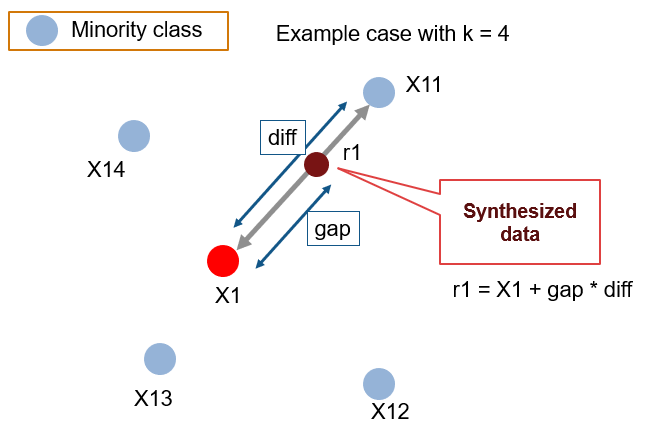

In [635]:
from imblearn.over_sampling import SMOTE

X = train_data.drop('booking_status', axis=1)
y = train_data['booking_status']

smote = SMOTE(random_state=42)

# fit predictor and target variable 
x_smote, y_smote = smote.fit_resample(X, y)

## Training Our Model using XGBoost

The XGBoost model starts by making a very simple guess to predict the output based on our input features. This is usually just the average of the target column we're trying to predict.

After making this initial guess, the model calculates how far off (the error) each of these initial predictions were from the actual values. This difference is called the "residual".

Next, the model creates a "decision tree", which is a flowchart-like structure of questions about our input data (it's important to understand how DT's make predictions). However, this tree isn't designed to predict the target directly. Instead, it's designed to predict the residuals which are the errors made by our initial simple guess.

The predictions made by this tree are then scaled down, or "dampened", by a factor known as the "learning rate".

These scaled down tree predictions are then added to our initial predictions, improving them a bit.

(Each new tree tries to correct the mistakes (residuals) of the previous trees. If we just added these corrections directly (without scaling them down), we might overcorrect and make the model too complex, leading to overfitting. Overfitting is when the model learns the training data too well, including its noise and outliers, and performs poorly on new, unseen data. To avoid this, we multiply the corrections from each new tree by the learning rate before adding them to our predictions. This "dampens" the corrections, making the model learn more slowly and helping to prevent overfitting.)

The model then repeats steps 2 to 5, each time creating a new decision tree to correct the errors of the previous one.

So, as a summary, XGBoost is like a team of decision trees where each new member learns from the mistakes of the previous members, aiming to continually get better at predicting the target variable.

For more information / mathematical explanation refer to:
https://xgboost.readthedocs.io/en/stable/

Or you can check out the Ensamble Methods chapter of a book: 
Charu C. Aggarwal - Data Mining The Textbook

In [639]:
X_train

no_of_adults  no_of_weekend_nights  no_of_week_nights  lead_time  \
35846      0.500000              0.000000           0.176471   0.129601   
9997       0.500000              0.000000           0.058824   0.343115   
30997      0.250000              0.000000           0.117647   0.568849   
38510      0.500000              0.142857           0.176471   0.012683   
35575      0.258742              0.000000           0.117647   0.270280   
...             ...                   ...                ...        ...   
6265       0.500000              0.428571           0.352941   0.544018   
11284      0.500000              0.000000           0.176471   0.133183   
38158      0.500000              0.000000           0.048526   0.083803   
860        0.250000              0.142857           0.058824   0.408578   
15795      0.500000              0.285714           0.176471   0.489842   

       arrival_month  avg_price_per_room  type_of_meal_plan_Meal Plan 1  \
35846       0.363636            0.191855                            1.0   
9997        0.454545            0.229630                            1.0   
30997       0.454545            0.191855                            1.0   
38510       0.272727            0.197365                            1.0   
35575       0.184997            0.191855                            1.0   
...              ...                 ...                            ...   
6265        0.454545            0.191855                            1.0   
11284       0.636364            0.191855                            1.0   
38158       0.074995            0.191855                            1.0   
860         0.636364            0.191855                            1.0   
15795       0.090909            0.191855                            1.0   

       type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
35846                            0.0                            0.0   
9997                             0.0                            0.0   
30997                            0.0                            0.0   
38510                            0.0                            0.0   
35575                            0.0                            0.0   
...                              ...                            ...   
6265                             0.0                            0.0   
11284                            0.0                            0.0   
38158                            0.0                            0.0   
860                              0.0                            0.0   
15795                            0.0                            0.0   

       type_of_meal_plan_Not Selected  ...  room_type_reserved_Room_Type 3  \
35846                             0.0  ...                             0.0   
9997                              0.0  ...                             0.0   
30997                             0.0  ...                             0.0   
38510                             0.0  ...                             0.0   
35575                             0.0  ...                             0.0   
...                               ...  ...                             ...   
6265                              0.0  ...                             0.0   
11284                             0.0  ...                             0.0   
38158                             0.0  ...                             0.0   
860                               0.0  ...                             0.0   
15795                             0.0  ...                             0.0   

       room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
35846                             0.0                             0.0   
9997                              0.0                             0.0   
30997                             0.0                             0.0   
38510                             0.0                             0.0   
35575                             1.0             

The table above would be our final table that will be used for training the model, it doesn't have missing values, and it has some engineered featured based on our transformations we did earlier.

In [636]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)


In [637]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline
pipe = Pipeline([
    ('clf', xgb.XGBClassifier(use_label_encoder=False))
])

params={
 "clf__learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
 "clf__max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "clf__min_child_weight" : [ 1, 3, 5, 7 ],
 "clf__gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "clf__colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "clf__subsample"        : [0.6, 0.7, 0.8, 0.9, 1.0],
 "clf__reg_alpha"        : [0, 0.001, 0.005, 0.01, 0.05],
 "clf__reg_lambda"       : [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Create the GridSearchCV object
cv = RandomizedSearchCV(pipe, params, cv=5, scoring='accuracy')

# Fit to the training set
cv.fit(X_train, Y_train)

# Predict the labels of the validation set
Y_pred = cv.predict(X_val)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_val, Y_val)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

/Users/diellor/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/Users/diellor/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/Users/diellor/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/Users/diellor/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/Users/diellor/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/Users/diellor/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/Users/diellor/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/Users/diello

Accuracy: 0.7448909299655568
Tuned Model Parameters: {'clf__subsample': 0.7, 'clf__reg_lambda': 1.0, 'clf__reg_alpha': 0.001, 'clf__min_child_weight': 1, 'clf__max_depth': 15, 'clf__learning_rate': 0.2, 'clf__gamma': 0.4, 'clf__colsample_bytree': 0.4}


We could see that the Accuracy of our model is 0.74 in our validation data, now this model is ready to be used on Test Data. The hotels can use this model, in order to find out if their customer is going to hold onto the reservation they made or not.

### I'm assuming that arrival_year doesn't have to play much role in determining if people are cancelling the bookings or not, also the arrival_date has a lot of missing values, and I will assume initially that it's not much important, so i;ll drop these columns

In [638]:
# train_data = train_data.drop('arrival_year',axis=1)
# train_data = train_data.drop('arrival_date',axis=1)

Categorical data will be:
1. 'Booking_ID',
2. 'type_of_meal_plan',
3. 'room_type_reserved',
4. 'market_segment_type'

But also, 
1. required_car_parking_space (min: 0, max: 1)
3. arrival_month (min: 1, max: 12)
4. repeated_guest (min: 0, max: 1)

Replace missing values of these features, where there are alot of missing vals.
- room_type_reserved                      0.652035 (CATEGORICAL)
- avg_price_per_room                      0.722547
- no_of_weekend_nights                    0.763255
- repeated_guest                          0.765093
- lead_time                               0.787576
- arrival_date                            0.832848
- no_of_children                          0.845529

In [28]:
## MODE - CATEGORICAL
## MEDIAN - CONTINIOUS
## Check their unique values, and apply accorndingly
## DROP MISSING VALUES the ones without label, since there are not too much

train_data = handle_missing(train_data, columns=['no_of_adults',
                                    'no_of_children',
                                    'required_car_parking_space',
                                    'repeated_guest','no_of_previous_cancellations','no_of_previous_cancellations'
                                   ,'no_of_previous_cancellations','no_of_previous_bookings_not_canceled',
                                                "type_of_meal_plan","room_type_reserved","market_segment_type",
                                                 ],
               method = 'mode')

train_data = handle_missing(train_data, columns=['no_of_special_requests','arrival_month'], method = 'median')



train_data = handle_missing(train_data, columns=['avg_price_per_room'], method = 'mean')


train_data = handle_missing(train_data, columns=['no_of_children','no_of_week_nights','no_of_weekend_nights','lead_time'], method = 'random')



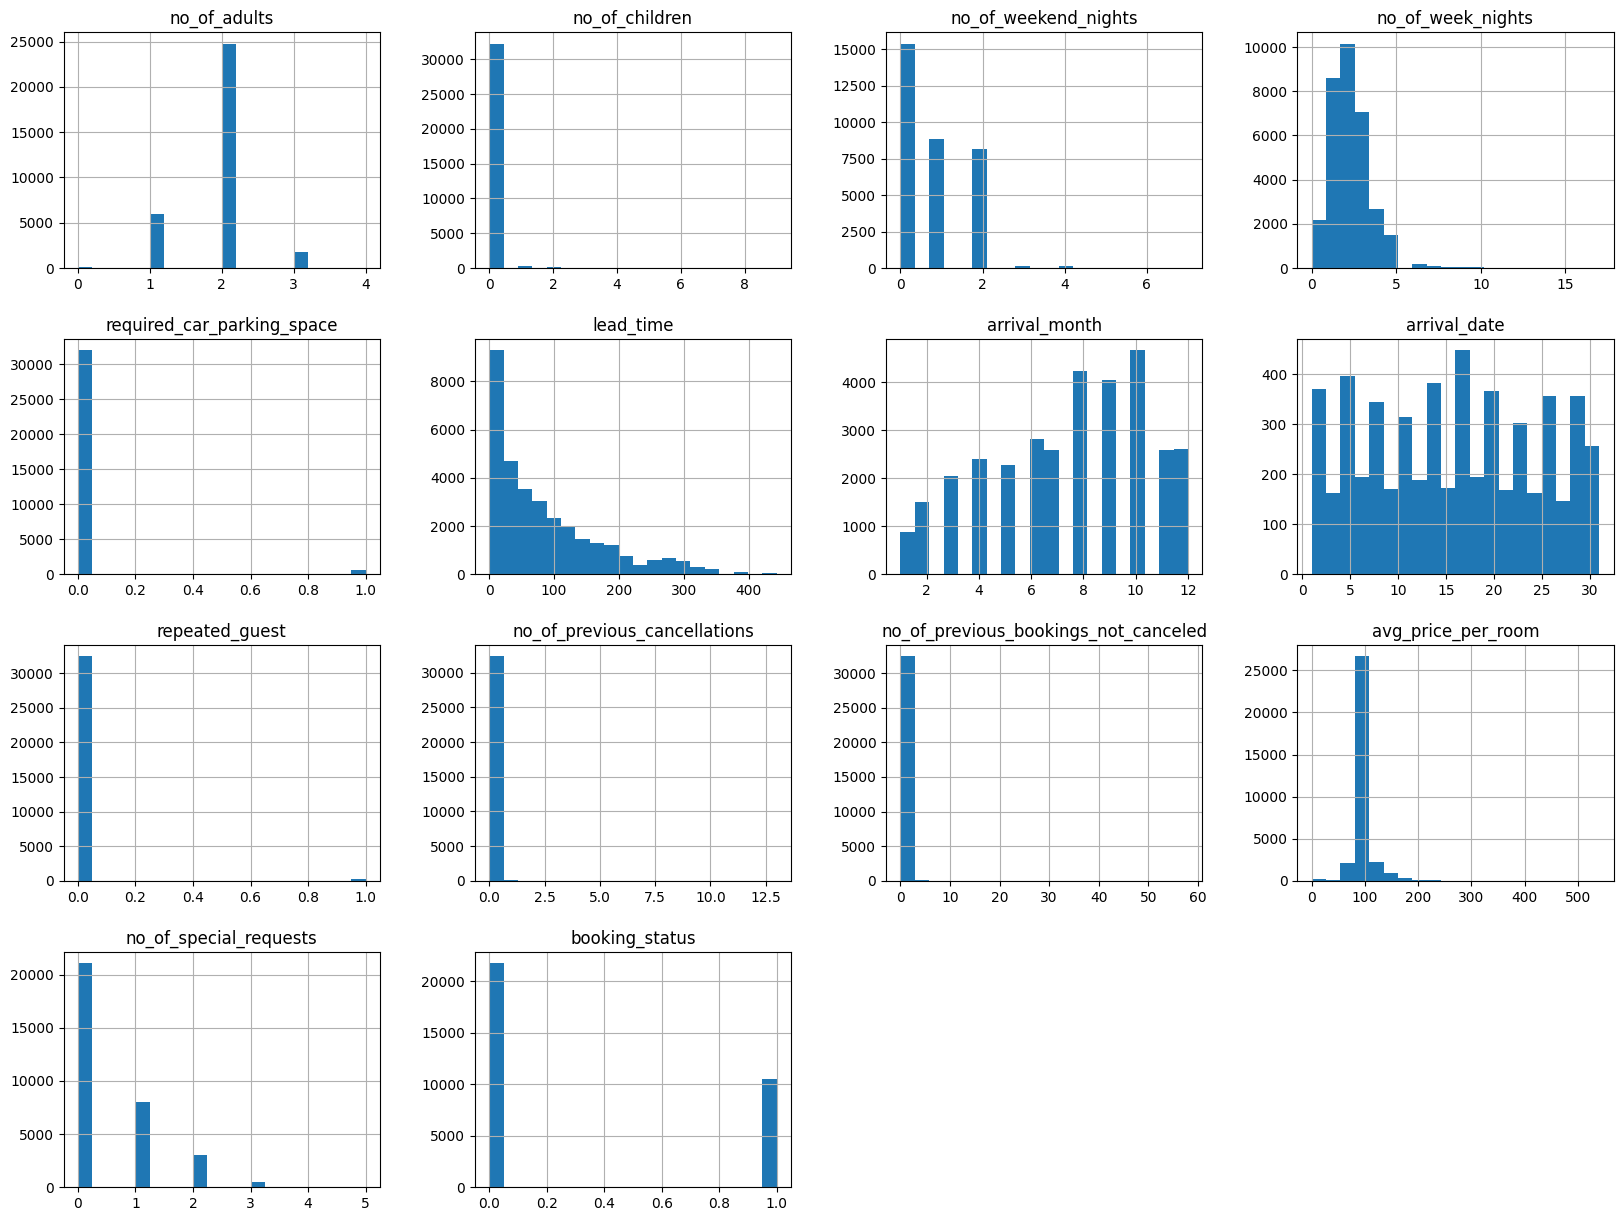

In [29]:
train_data.hist(bins=20, figsize=(20,15))
plt.show()

<AxesSubplot:>

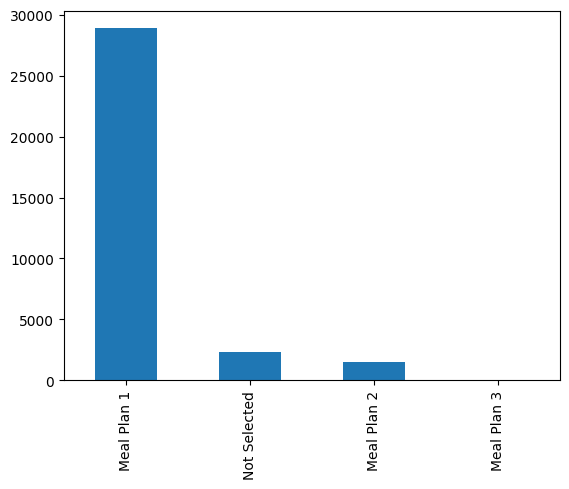

In [30]:
train_data["type_of_meal_plan"].value_counts().plot(kind="bar")


<AxesSubplot:>

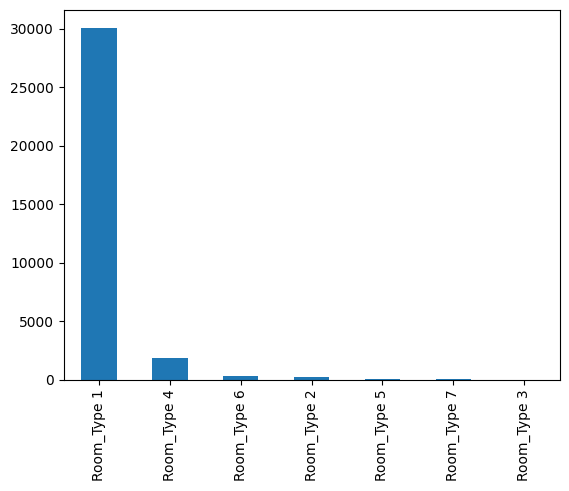

In [31]:
train_data["room_type_reserved"].value_counts().plot(kind="bar")


<AxesSubplot:>

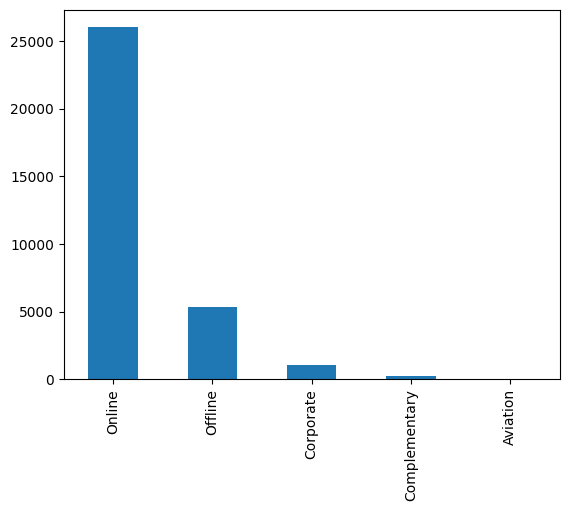

In [32]:
train_data["market_segment_type"].value_counts().plot(kind="bar")

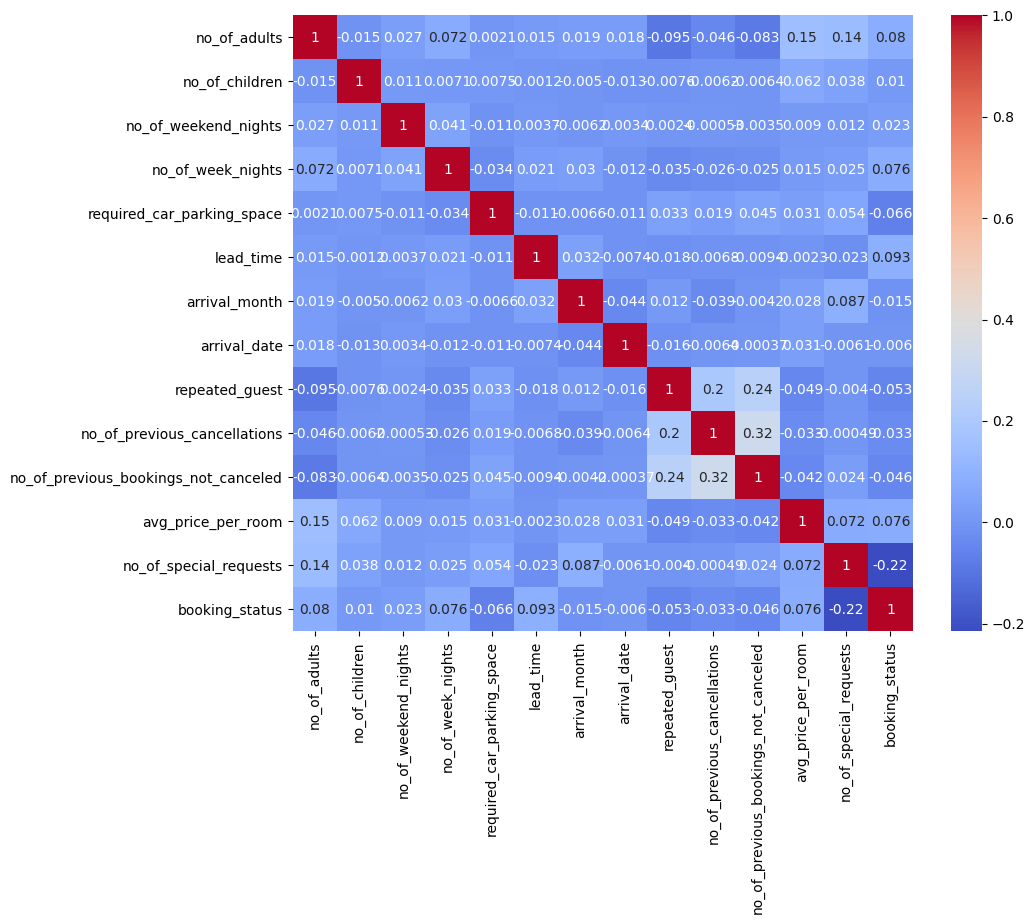

In [33]:
import pandas as pd
import seaborn as sns

# Compute the correlation matrix
corr_matrix = train_data.corr()

# Set the size of the figure
plt.figure(figsize=(10, 8))

# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [34]:
train_data.dropna(subset=['booking_status'], inplace=True)
train_data.isnull().sum()

Booking_ID                                  0
no_of_adults                                0
no_of_children                              0
no_of_weekend_nights                        0
no_of_week_nights                           0
type_of_meal_plan                           0
required_car_parking_space                  0
room_type_reserved                          0
lead_time                                   0
arrival_month                               0
arrival_date                            26903
market_segment_type                         0
repeated_guest                              0
no_of_previous_cancellations                0
no_of_previous_bookings_not_canceled        0
avg_price_per_room                          0
no_of_special_requests                      0
booking_status                              0
dtype: int64

In [35]:
train_data['booking_status'].value_counts()

0.0    21774
1.0    10521
Name: booking_status, dtype: int64

In [36]:
train_data.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  32295.000000    32295.000000          32295.000000       32295.000000   
mean       1.865985        0.016071              0.803994           2.205728   
std        0.483517        0.164949              0.873409           1.410740   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000        9.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_month  arrival_date  \
count                32295.000000  32295.000000   32295.000000   5392.000000   
mean                     0.018486     85.935934       7.434185     15.523368   
std                      0.134702     85.849426       3.023370      8.722234   
min                      0.000000      0.000000       1.000000      1.000000   
25%                      0.000000     18.000000       5.000000      8.000000   
50%                      0.000000     59.000000       8.000000     16.000000   
75%                      0.000000    127.000000      10.000000     23.000000   
max                      1.000000    443.000000      12.000000     31.000000   

       repeated_guest  no_of_previous_cancellations  \
count    32295.000000                  32295.000000   
mean         0.006100                      0.023626   
std          0.077865                      0.370499   
min          0.000000                      0.000000   
25%          0.000000                      0.000000   
50%          0.000000                      0.000000   
75%          0.000000                      0.000000   
max          1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          32295.000000        32295.000000   
mean                               0.090293          103.591081   
std                                1.340065           18.651547   
min                                0.000000            0.000000   
25%                                0.000000          103.601652   
50%                                0.000000          103.601652   
75%                                0.000000          103.601652   
max                               58.000000          540.000000   

       no_of_special_requests  booking_status  
count            32295.000000    32295.000000  
mean                 0.480848        0.325778  
std                  0.737185        0.468672  
min                  0.000000        0.000000  
25%                  0.000000        0.000000  
50%                  0.000000        0.000000  
75%                  1.000000        1.000000  
max                  5.000000        1.000000

In [37]:
test_data

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0      INN04969           2.0             NaN                   1.0   
1      INN34541           2.0             0.0                   NaN   
2      INN36109           2.0             NaN                   NaN   
3      INN01554           2.0             NaN                   0.0   
4      INN24975           2.0             NaN                   NaN   
...         ...           ...             ...                   ...   
3588   INN29523           1.0             NaN                   NaN   
3589   INN25061           2.0             NaN                   1.0   
3590   INN08475           2.0             NaN                   NaN   
3591   INN13558           1.0             NaN                   NaN   
3592   INN00626           2.0             NaN                   0.0   

      no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                   0.0       Meal Plan 1                         NaN   
1                   2.0       Meal Plan 1                         0.0   
2                   2.0       Meal Plan 1                         0.0   
3                   3.0               NaN                         0.0   
4                   NaN               NaN                         0.0   
...                 ...               ...                         ...   
3588                2.0       Meal Plan 2                         0.0   
3589                NaN      Not Selected                         0.0   
3590                NaN               NaN                         NaN   
3591                0.0       Meal Plan 1                         NaN   
3592                4.0               NaN                         NaN   

     room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0                   NaN        NaN        2017.0            8.0          23.0   
1                   NaN        NaN        2018.0            2.0           NaN   
2                   NaN        NaN        2018.0           12.0           NaN   
3                   NaN        NaN        2018.0            6.0          21.0   
4                   NaN        NaN        2018.0            9.0           NaN   
...                 ...        ...           ...            ...           ...   
3588        Room_Type 1       39.0        2017.0            8.0           NaN   
3589                NaN        NaN        2018.0            6.0           NaN   
3590                NaN      308.0        2018.0           11.0           NaN   
3591                NaN        NaN        2018.0            7.0          24.0   
3592        Room_Type 4        NaN        2017.0           10.0           NaN   

     market_segment_type  repeated_guest  no_of_previous_cancellations  \
0                    NaN             NaN                           0.0   
1                Offline             NaN                           0.0   
2                    NaN             NaN                           0.0   
3                 Online             NaN                           0.0   
4                    NaN             NaN                           0.0   
...                  ...             ...                           ...   
3588             Offline             NaN                           0.0   
3589              Online             0.0                           0.0   
3590              Online             NaN                           0.0   
3591                 NaN             NaN                           3.0   
3592                 NaN             0.0                           0.0   

      no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                      NaN                 NaN   
1                                      0.0                 NaN   
2                                      NaN                 NaN   
3                                      0.0                 NaN   
4                                      NaN                 NaN   
...              

In [38]:
test_data = test_data.drop('arrival_year',axis=1)
# test_data = test_data.drop('arrival_date',axis=1)

In [39]:
## MODE - CATEGORICAL
## MEDIAN - CONTINIOUS
## Check their unique values, and apply accorndingly
## DROP MISSING VALUES the ones without label, since there are not too much

test_data = handle_missing(test_data, columns=['no_of_adults',
                                    'no_of_children',
                                    'required_car_parking_space',
                                    'repeated_guest','no_of_previous_cancellations','no_of_previous_cancellations'
                                   ,'no_of_previous_cancellations','no_of_previous_bookings_not_canceled',
                                                "type_of_meal_plan","room_type_reserved","market_segment_type",
                                                 ],
               method = 'mode')

test_data = handle_missing(test_data, columns=['no_of_special_requests','arrival_month'], method = 'median')



test_data = handle_missing(test_data, columns=['avg_price_per_room'], method = 'mean')


test_data = handle_missing(test_data, columns=['no_of_children','no_of_week_nights','no_of_weekend_nights','lead_time'], method = 'random')



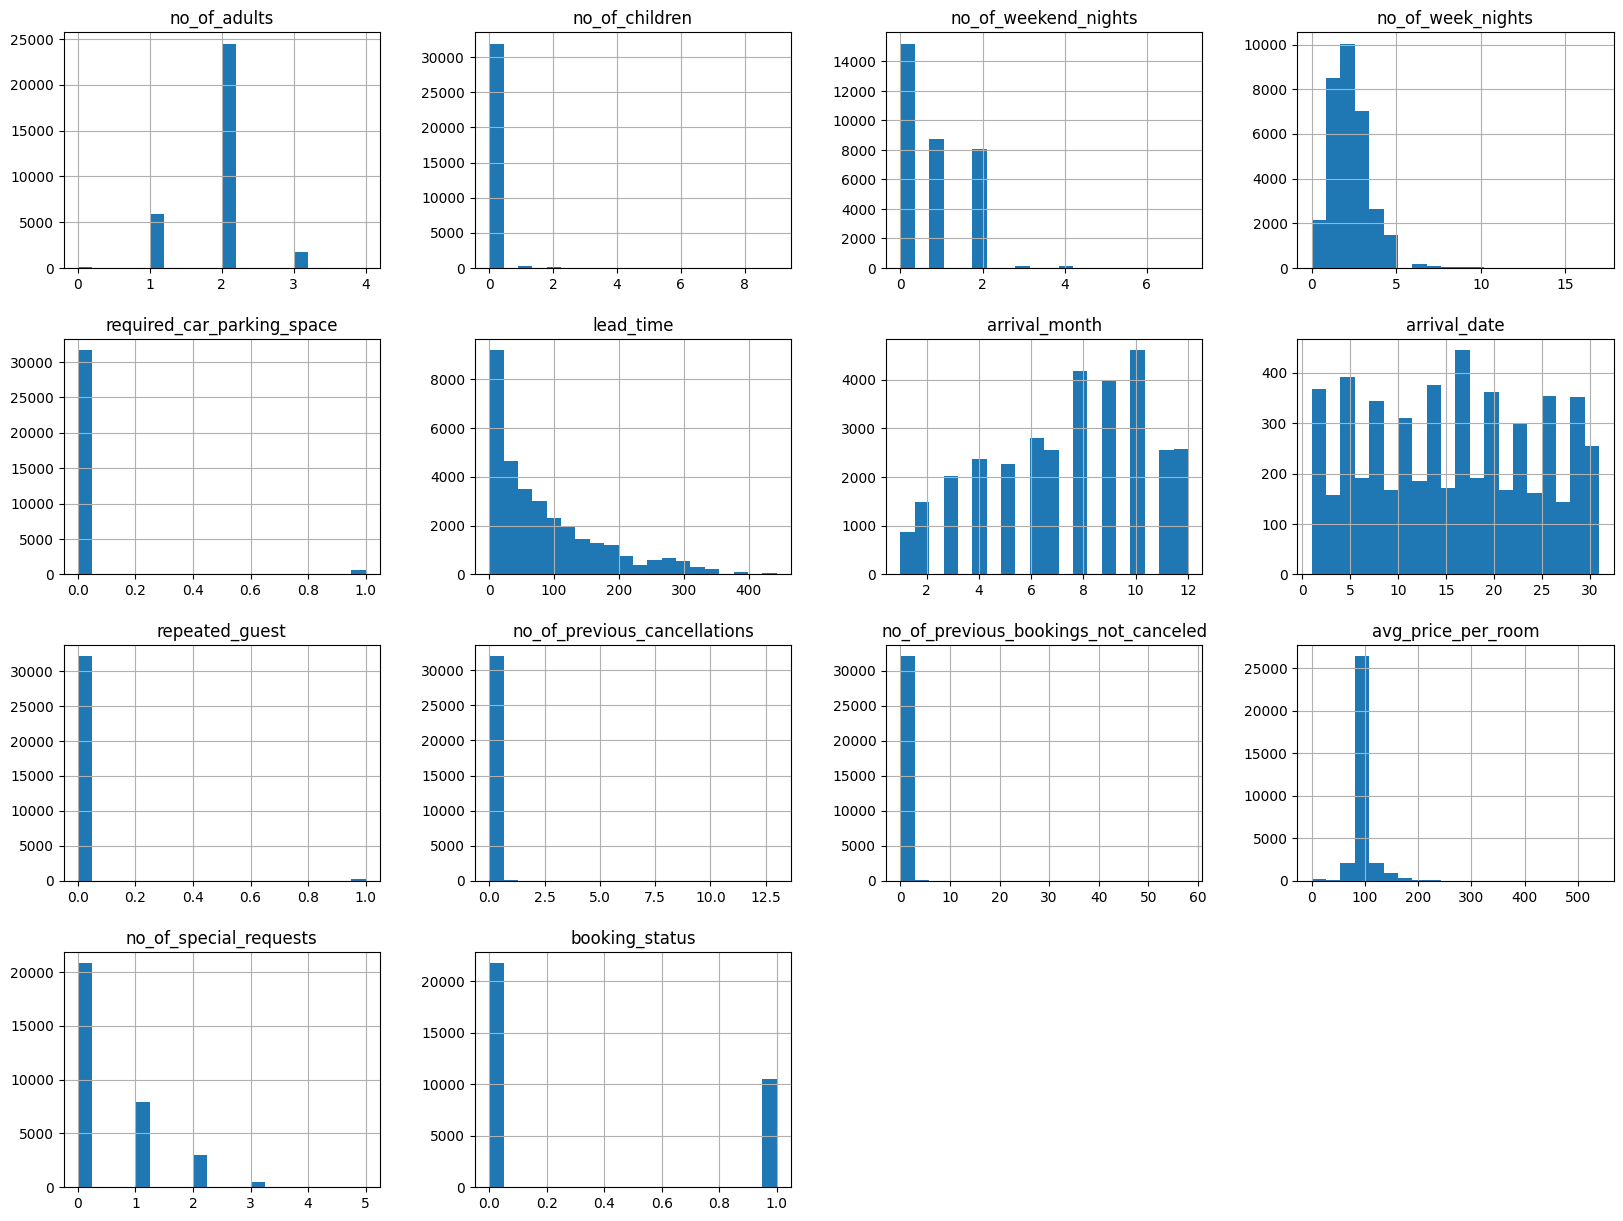

In [40]:
train_data.hist(bins=20, figsize=(20,15))
plt.show()

In [41]:
train_data

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN10204           2.0             0.0                   0.0   
1       INN20020           2.0             0.0                   0.0   
2       INN16435           1.0             0.0                   2.0   
3       INN07143           3.0             0.0                   0.0   
4       INN20511           1.0             0.0                   1.0   
...          ...           ...             ...                   ...   
32642   INN16851           2.0             0.0                   0.0   
32643   INN06266           1.0             0.0                   0.0   
32644   INN11285           2.0             0.0                   2.0   
32645   INN00861           2.0             0.0                   2.0   
32646   INN15796           2.0             0.0                   0.0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                    2.0       Meal Plan 2                         0.0   
1                    2.0       Meal Plan 1                         0.0   
2                    2.0       Meal Plan 1                         0.0   
3                    3.0       Meal Plan 1                         0.0   
4                    1.0       Meal Plan 1                         0.0   
...                  ...               ...                         ...   
32642                1.0       Meal Plan 1                         0.0   
32643                2.0       Meal Plan 2                         0.0   
32644                2.0       Meal Plan 1                         0.0   
32645                3.0       Meal Plan 1                         0.0   
32646                2.0       Meal Plan 1                         0.0   

      room_type_reserved  lead_time  arrival_month  arrival_date  \
0            Room_Type 6      185.0            9.0           NaN   
1            Room_Type 1       13.0           12.0           NaN   
2            Room_Type 1        1.0           11.0           NaN   
3            Room_Type 1      100.0            5.0           NaN   
4            Room_Type 1       41.0           11.0           NaN   
...                  ...        ...            ...           ...   
32642        Room_Type 1       43.0           12.0          26.0   
32643        Room_Type 1      102.0           10.0           NaN   
32644        Room_Type 1       37.0            5.0           NaN   
32645        Room_Type 1       12.0            6.0           NaN   
32646        Room_Type 1       14.0            9.0          15.0   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
0                  Online             0.0                           0.0   
1                  Online             0.0                           0.0   
2                  Online             0.0                           0.0   
3                  Online             0.0                           0.0   
4                  Online             0.0                           0.0   
...                   ...             ...                           ...   
32642             Offline             0.0                           0.0   
32643              Online             0.0                           0.0   
32644           Corporate             0.0                           0.0   
32645              Online             0.0                           0.0   
32646              Online             0.0                           0.0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                       0.0          103.601652   
1                                       0.0          103.601652   
2                                       0.0          103.601652   
3                                       0.0          103.601652   
4                                       0.0          150.000000   
...                                     ...                 ...   
32642                                   0.0          103.601652  

In [42]:
train_data = train_data.drop('Booking_ID',axis=1)
train_data = train_data.drop('no_of_children',axis=1)
train_data = train_data.drop('required_car_parking_space',axis=1)
train_data = train_data.drop('repeated_guest',axis=1)
train_data = train_data.drop('no_of_previous_cancellations',axis=1)
train_data = train_data.drop('no_of_previous_bookings_not_canceled',axis=1)

test_data = test_data.drop('Booking_ID',axis=1)
test_data = test_data.drop('no_of_children',axis=1)
test_data = test_data.drop('required_car_parking_space',axis=1)
test_data = test_data.drop('repeated_guest',axis=1)
test_data = test_data.drop('no_of_previous_cancellations',axis=1)
test_data = test_data.drop('no_of_previous_bookings_not_canceled',axis=1)

In [43]:
# test_data.isnull().sum()

In [44]:
# arrival_month (min: 1, max: 12)
# 'type_of_meal_plan',
# 'room_type_reserved',
# 'market_segment_type'

In [45]:
# type_of_meal_plan = pd.get_dummies(train_data['type_of_meal_plan'],drop_first=True)
# room_type_reserved = pd.get_dummies(train_data['room_type_reserved'],drop_first=True)
# market_segment_type = pd.get_dummies(train_data['market_segment_type'],drop_first=True)
# arrival_month = pd.get_dummies(train_data['arrival_month'],drop_first=True)


# type_of_meal_plan_test = pd.get_dummies(test_data['type_of_meal_plan'],drop_first=True)
# room_type_reserved_test = pd.get_dummies(test_data['room_type_reserved'],drop_first=True)
# market_segment_type_test = pd.get_dummies(test_data['market_segment_type'],drop_first=True)
# arrival_month_test = pd.get_dummies(test_data['arrival_month'],drop_first=True)


# train_data = train_data.drop('type_of_meal_plan',axis=1)
# train_data = train_data.drop('room_type_reserved',axis=1)
# train_data = train_data.drop('market_segment_type',axis=1)
# train_data = train_data.drop('arrival_month',axis=1)

# test_data = test_data.drop('type_of_meal_plan',axis=1)
# test_data = test_data.drop('room_type_reserved',axis=1)
# test_data = test_data.drop('market_segment_type',axis=1)
# train_data = test_data.drop('arrival_month',axis=1)


In [47]:
arrival_month.isnull().sum()

NameError: name 'arrival_month' is not defined

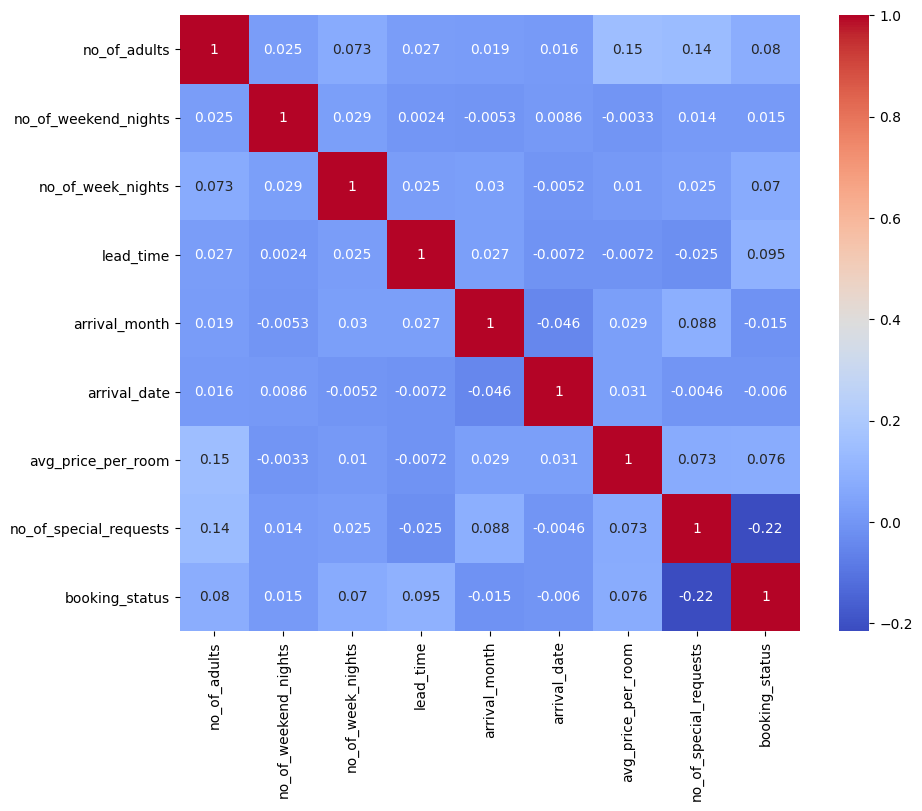

In [ ]:
import pandas as pd
import seaborn as sns

# Compute the correlation matrix
corr_matrix = train_data.corr()

# Set the size of the figure
plt.figure(figsize=(10, 8))

# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [ ]:
# train_data = train_data.drop('arrival_month',axis=1)
# test_data = test_data.drop('arrival_month',axis=1)

# train_data = train_data.drop('no_of_special_requests',axis=1)
# test_data = test_data.drop('no_of_special_requests',axis=1)

train_data = train_data.drop('no_of_weekend_nights',axis=1)
test_data = test_data.drop('no_of_weekend_nights',axis=1)

# train_data = train_data.drop('room_type_reserved',axis=1)
# test_data = test_data.drop('room_type_reserved',axis=1)

# train_data = train_data.drop('type_of_meal_plan',axis=1)
# test_data = test_data.drop('type_of_meal_plan',axis=1)

# train_data = train_data.drop('market_segment_type',axis=1)
# test_data = test_data.drop('market_segment_type',axis=1)



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(train_data.drop('booking_status', axis=1),
                                                  train_data['booking_status'],
                                                  test_size=0.2,
                                                  random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier

# Define the columns to apply OneHotEncoder to
one_hot_cols = ['type_of_meal_plan', 'room_type_reserved','market_segment_type']

# Define the pipeline with ColumnTransformer and XGBClassifier
estimators = [
    ('one_hot', ColumnTransformer([('encoder', OneHotEncoder(), one_hot_cols)], remainder='passthrough')),
    ('clf', XGBClassifier(random_state=8))
]
pipe = Pipeline(steps=estimators)


In [ ]:
params={
 "clf__learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
 "clf__max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "clf__min_child_weight" : [ 1, 3, 5, 7 ],
 "clf__gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "clf__colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "clf__subsample"        : [0.6, 0.7, 0.8, 0.9, 1.0],
 "clf__reg_alpha"        : [0, 0.001, 0.005, 0.01, 0.05],
 "clf__reg_lambda"       : [0.01, 0.1, 1.0, 10.0, 100.0]
}

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:
random_search=RandomizedSearchCV(pipe,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/diellor/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('one_hot',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('encoder',
                                                                               OneHotEncoder(),
                                                                               ['type_of_meal_plan',
                                                                                'room_type_reserved',
                                                                                'market_segment_type'])])),
                                             ('clf',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early...
                   param_distributions={'clf__colsample_bytree': [0.3, 0.4, 0.5,
                                                                  0.7],
                                        'clf__gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'clf__learning_rate': [0.05, 0.1, 0.15,
                                                               0.2, 0.25, 0.3],
                                        'clf__max_depth': [3, 4, 5, 6, 8, 10,
                                                           12, 15],
                                        'clf__min_child_weight': [1, 3, 5, 7],
                                        'clf__reg_alpha': [0, 0.001, 0.005,
                                                           0.01, 0.05],
                                        'clf__reg_lambda': [0.01, 0.1, 1.0,
                                                            10.0, 100.0],
                                        'clf__subsample': [0.6, 0.7, 0.8, 0.9,
                                                           1.0]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

Pipeline(steps=[('one_hot',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['type_of_meal_plan',
                                                   'room_type_reserved',
                                                   'market_segment_type'])])),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.4, early_stopping_rounds=None,
                               enable_catego...
                               feature_types=None, gamma=0.0, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None, min_child_weight=5,
                               missing=nan, monotone_constraints=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=8, ...))])

In [ ]:
random_search.best_params_

{'clf__subsample': 0.8,
 'clf__reg_lambda': 100.0,
 'clf__reg_alpha': 0.01,
 'clf__min_child_weight': 5,
 'clf__max_depth': 6,
 'clf__learning_rate': 0.2,
 'clf__gamma': 0.0,
 'clf__colsample_bytree': 0.4}

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = random_search.predict(X_val)


accuracy = accuracy_score(Y_val, y_pred)
print("Accuracy on validation set:", accuracy)

y_pred = random_search.predict(X_train)

accuracy = accuracy_score(Y_train, y_pred)
print("Accuracy on training set:", accuracy)

Accuracy on validation set: 0.7112556123238891
Accuracy on training set: 0.7250735407957888


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = random_search.predict(test_data)

y_pred = random_search.predict(X_train)

In [ ]:
y_pred 
## Since we don't have the real labels of the test_data I won't be able to show its accuracy. but it should be somewhere areound 70 since i used validation set before.

array([0, 1, 0, ..., 0, 0, 0])